# Part 1

## Clustering with Sparse Text Representations

In [ ]:
!pip install regex
!pip install nltk
!pip install sklearn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install ClusterEnsembles



  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement ClusterEnsembles (from versions: none)
ERROR: No matching distribution found for ClusterEnsembles


In [ ]:
import numpy as np
import sklearn
import nltk, string
import matplotlib.pyplot as plt

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)

    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# get dataset
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                  'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset = 'train',categories=categories, remove=('headers', 'footers'))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# count vectorizer on corpus
tf_vectorizer = CountVectorizer(min_df = 3, stop_words='english')
newsgroups_vectorized = tf_vectorizer.fit_transform(newsgroups.data)

# count vector to TF-IDF
transformer = TfidfTransformer()
newsgroups_tfidf = transformer.fit_transform(newsgroups_vectorized)

print('TF-IDF Dimensions: ', newsgroups_tfidf.shape)

TF-IDF Dimensions:  (4732, 17131)


***Question 1***

Dimensions of the TF-IDF matrix is (4732, 17131)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import numpy as np

# Get clusters
kmeans = KMeans(random_state=0, n_clusters=2, max_iter=1000, n_init=30).fit(newsgroups_tfidf)

In [ ]:
label_kmeans = []
for label in newsgroups.target:
    if label in [0, 1, 2, 3]:
        label_kmeans.append(0)
    else:
        label_kmeans.append(1)
contingency_table = contingency_matrix(label_kmeans, kmeans.labels_)
print('Contingency Table:  ', '\n', contingency_table)

Contingency Table:   
 [[1941  402]
 [  42 2347]]


***Question 2***

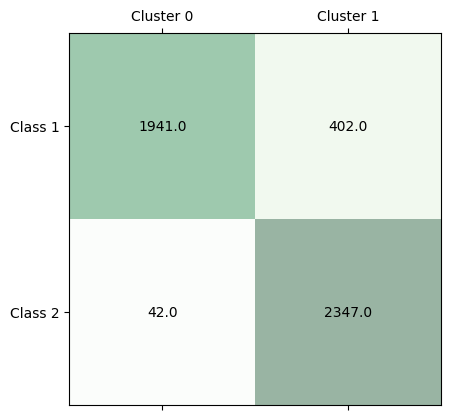

In [ ]:
from sklearn import metrics

# plot contingency matrix
plt.matshow(contingency_table, cmap=plt.cm.Greens, alpha=0.4)
for (i, j), z in np.ndenumerate(contingency_table):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xticks(range(2), ['Cluster 0', 'Cluster 1'])
plt.yticks(range(2), ['Class 1', 'Class 2'])
plt.show()


*** Q2 Answer: ***

The presented contingency table illustrates the outcomes of clustering. From the prominent diagonal pattern, we deduce an association between group 1 and category 2, as well as group 0 and category 1. Considering that we configured Kmeans with 2 clusters, aligning with the 2 categories in our data, the contingency matrix is expected to be square. Any discrepancy between the cluster count set in Kmeans and the data's category count would result in a non-square contingency matrix.

***Question 3***

In [ ]:
from sklearn.metrics import cluster

print("Homogeneity score: %0.3f" % cluster.homogeneity_score(label_kmeans, kmeans.labels_))
print("Completeness score: %0.3f" % cluster.completeness_score(label_kmeans, kmeans.labels_))
print("V-measure score: %0.3f" % cluster.v_measure_score(label_kmeans, kmeans.labels_))
print("Adjusted Rand Index: %0.3f" % cluster.adjusted_rand_score(label_kmeans, kmeans.labels_))
print("Adjusted mutual information score: %0.3f" % cluster.adjusted_mutual_info_score(label_kmeans, kmeans.labels_))

Homogeneity score: 0.589
Completeness score: 0.601
V-measure score: 0.595
Adjusted Rand Index: 0.660
Adjusted mutual information score: 0.595


## Clustering with Dense Text Representations

### 1. Generate dense representations for better K-Means Clustering

***Question 4***

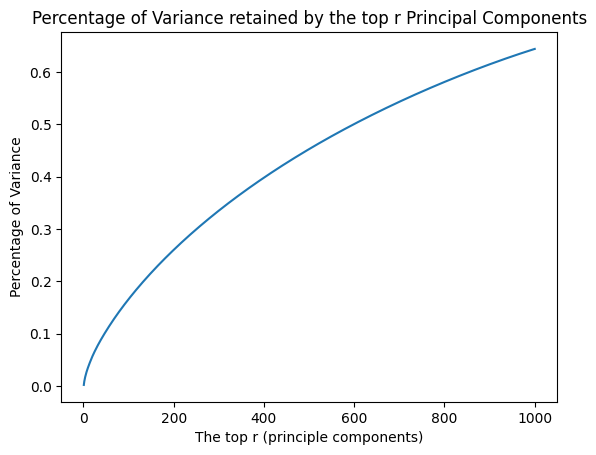

In [ ]:
from sklearn.decomposition import TruncatedSVD

# get principle components
svd = TruncatedSVD(n_components=1000, random_state=0)
newsgroups_lsi = svd.fit_transform(newsgroups_tfidf)

# get explained variance ratio
x = np.linspace(1, 1000, 1000)
ratio = svd.explained_variance_ratio_.cumsum()

# plot explained variance ratio
plt.plot(x, ratio)
plt.ylabel('Percentage of Variance')
plt.xlabel('The top r (principle components)')
plt.title('Percentage of Variance retained by the top r Principal Components')
plt.show()

***Question 5***

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
import statistics

def calculate_svd_scores(r, k, X, y):
    svd_adj_rand_score = []
    svd_adj_mutual_score = []
    svd_hom_score = []
    svd_comp_score = []
    svd_v_score = []

    for dim in r:
        svd = TruncatedSVD(n_components=dim, random_state=0)
        truncated_svd = svd.fit_transform(X)
        kmeans = KMeans(random_state=0, n_clusters=k, max_iter=1000, n_init=30)
        kmeans.fit(truncated_svd)

        svd_adj_rand_score.append(adjusted_rand_score(y, kmeans.labels_))
        svd_adj_mutual_score.append(adjusted_mutual_info_score(y, kmeans.labels_))
        svd_hom_score.append(homogeneity_score(y, kmeans.labels_))
        svd_comp_score.append(completeness_score(y, kmeans.labels_))
        svd_v_score.append(v_measure_score(y, kmeans.labels_))

    return svd_adj_rand_score, svd_adj_mutual_score, svd_hom_score, svd_comp_score, svd_v_score

def plot_metrics_vs_r(r, svd_adj_rand_score, svd_adj_mutual_score, svd_hom_score, svd_comp_score, svd_v_score):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

    def plot(ax, data, label, title, xlabel, ylabel):
        ax.plot(r, data, label=label)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    plot(axes[0, 0], svd_adj_rand_score, 'SVD', 'r Vs Random Adjusted Score', 'r value', 'Random Adjusted Score')
    plot(axes[0, 1], svd_adj_mutual_score, 'SVD', 'r Vs Adjusted Mutual Information Score', 'r value', 'Adjusted Mutual Information Score')
    plot(axes[0, 2], svd_hom_score, 'SVD', 'r Vs Homogeneity Score', 'r value', 'Homogeneity Score')
    plot(axes[1, 0], svd_comp_score, 'SVD', 'r Vs Completeness Score', 'r value', 'Completeness Score')
    plot(axes[1, 1], svd_v_score, 'SVD', 'r Vs V-Measure Score', 'r value', 'V-Measure Score')

    axes[1, 2].axis('off')
    fig.legend(['SVD'], loc='center right')

    plt.show()

def find_best_r_value(scores):
    argmaxes = [i.index(max(i)) for i in scores]
    best_r_ind = round(statistics.mode(argmaxes))
    return best_r_ind

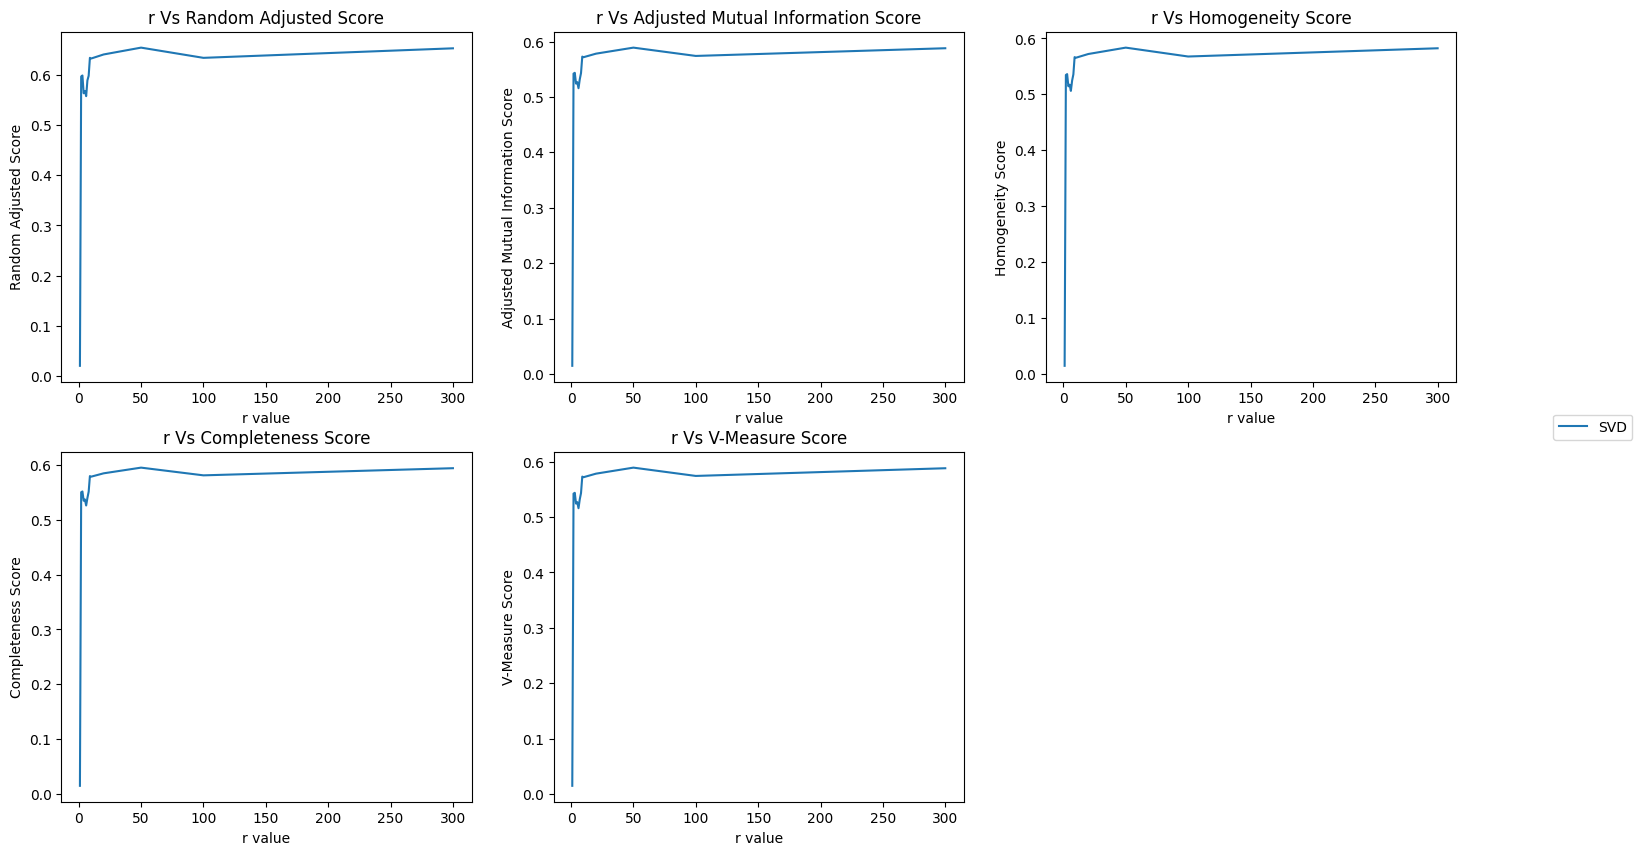

Best SVD r value: 50


In [ ]:
r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
k = 2

svd_scores = calculate_svd_scores(r, k,  newsgroups_tfidf, label_kmeans)

svd_adj_rand_score, svd_adj_mutual_score, svd_hom_score, svd_comp_score, svd_v_score = svd_scores

plot_metrics_vs_r(r, svd_adj_rand_score, svd_adj_mutual_score, svd_hom_score, svd_comp_score, svd_v_score)

best_svd_r_value = r[find_best_r_value(svd_scores)]
print('Best SVD r value:', best_svd_r_value)

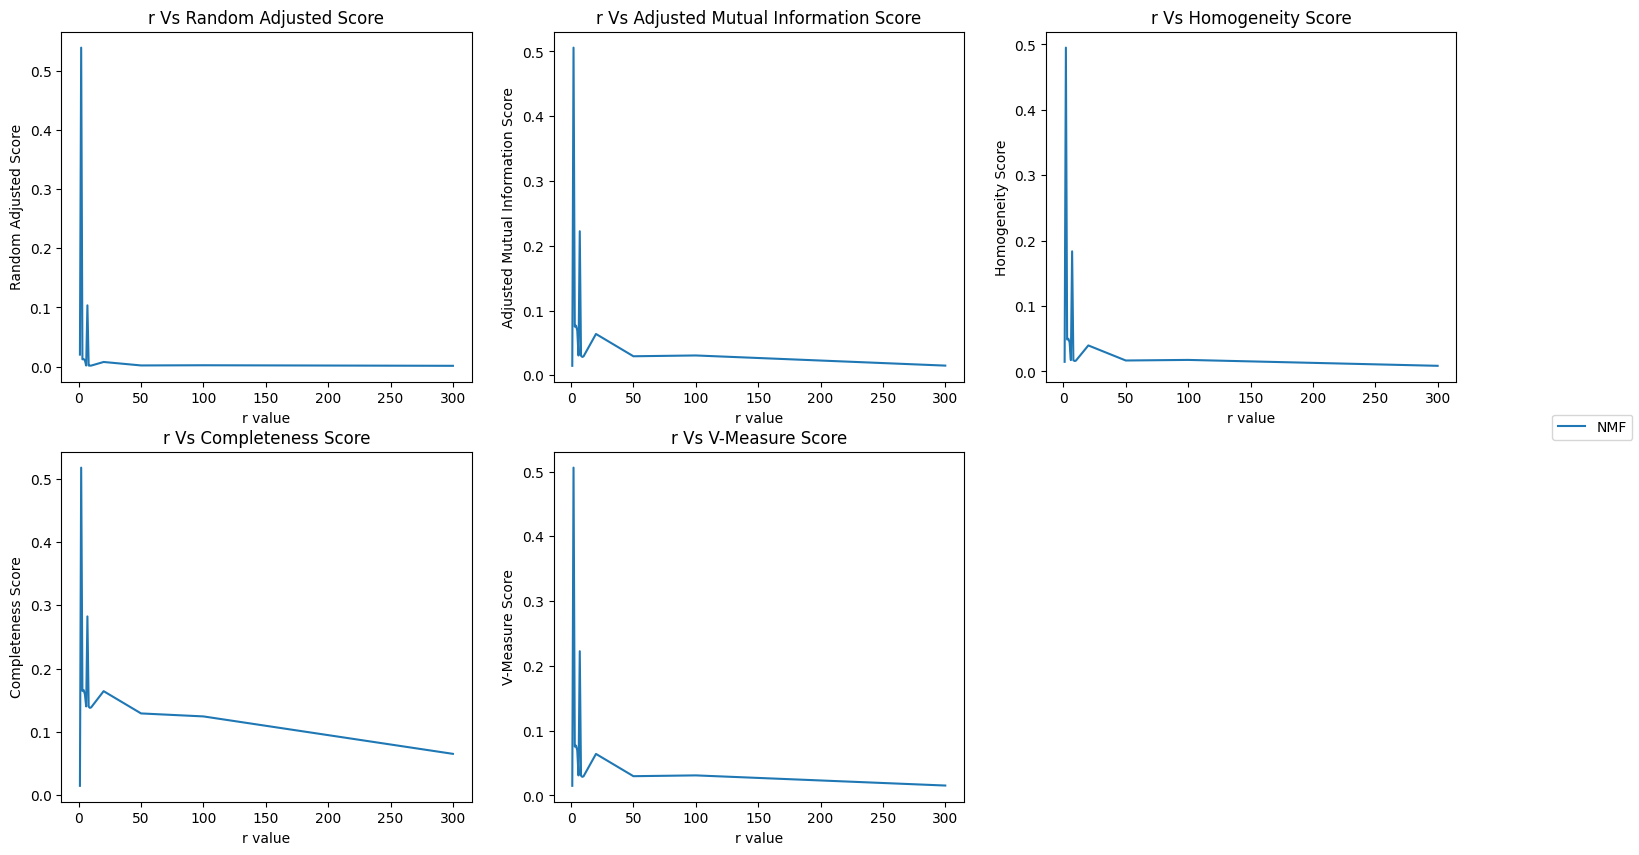

Best NMF r value: 2


In [ ]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import statistics

def calculate_nmf_scores(r_values, k, X, y):
    adj_rand_score = []
    adj_mutual_score = []
    hom_score = []
    comp_score = []
    v_score = []

    for dim in r_values:
        nmf = NMF(n_components=dim, init='random', random_state=0, max_iter=500)
        trunc_nmf = nmf.fit_transform(X)
        kmeans = KMeans(random_state=0, n_clusters=k, max_iter=1000, n_init=30)
        kmeans.fit(trunc_nmf)
        adj_rand_score.append(metrics.adjusted_rand_score(y, kmeans.labels_))
        adj_mutual_score.append(metrics.adjusted_mutual_info_score(y, kmeans.labels_))
        hom_score.append(metrics.homogeneity_score(y, kmeans.labels_))
        comp_score.append(metrics.completeness_score(y, kmeans.labels_))
        v_score.append(metrics.v_measure_score(y, kmeans.labels_))

    return adj_rand_score, adj_mutual_score, hom_score, comp_score, v_score

def plot_nmf_scores(r_values, scores):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    metrics_names = ['Random Adjusted', 'Adjusted Mutual Information', 'Homogeneity', 'Completeness', 'V-Measure']

    for i, metric in enumerate(scores):
        row, col = divmod(i, 3)
        axes[row, col].plot(r_values, metric, label='NMF')
        axes[row, col].set_title(f'r Vs {metrics_names[i]} Score')
        axes[row, col].set_xlabel('r value')
        axes[row, col].set_ylabel(f'{metrics_names[i]} Score')

    axes[1, 2].axis('off')
    fig.legend(['NMF'], loc='center right')
    plt.show()

def find_best_r_value(scores):
    argmaxes = [metric.index(max(metric)) for metric in scores]
    best_r_ind = round(statistics.mode(argmaxes))
    return best_r_ind

# Assuming you have r, newsgroups_tfidf, label_kmeans defined
r_values = r
k_clusters = 2

nmf_scores = calculate_nmf_scores(r_values, k_clusters, newsgroups_tfidf, label_kmeans)
nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score = nmf_scores

plot_nmf_scores(r_values, [nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score])

nmf_score = [nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score]
best_nmf_r_value = find_best_r_value(nmf_score)

print('Best NMF r value:', r[best_nmf_r_value])


***Q5 Answer:***

A good choice of r for SVD is 50.
A good choice of r for NMF is 2.

***Question 6*** \
While dimensionality reduction helps to deal with noisy data and shorten the running time of the algorithm, it may also lead to loss of information, including noise. Thus, as the dimensionality reduction parameter r increases, the accuracy of KMeans clustering may decrease because we truncate too much data. However, as r increases, we may observe that the clustering score initially increases and then decreases. The initial increase indicates that we have struck a good balance between scores and truncated data. An eventual decrease may indicate that as the truncated data increases, more noise is introduced, leading to inaccurate KMeans clustering and lower scores. Thus, we can observe a non-monotonic behavior of the measurements as r increases.

***Question 7***

In [ ]:
def print_average_metrics(method, hom_score, comp_score, v_score, adj_rand_score, adj_mutual_score):
    print(f"\n{method} Metrics:")
    print("Homogeneity: ", np.mean(hom_score))
    print("Completeness: ", np.mean(comp_score))
    print("V-measure: ", np.mean(v_score))
    print("Adjusted Rand-Index: ", np.mean(adj_rand_score))
    print("Adjusted Mutual Information: ", np.mean(adj_mutual_score))

print_average_metrics("SVD", svd_hom_score, svd_comp_score, svd_v_score, svd_adj_rand_score, svd_adj_mutual_score)
print_average_metrics("NMF", nmf_hom_score, nmf_comp_score, nmf_v_score, nmf_adj_rand_score, nmf_mutual_score)



SVD Metrics:
Homogeneity:  0.5086295760481007
Completeness:  0.5226573391383235
V-measure:  0.515542491271773
Adjusted Rand-Index:  0.567182526171996
Adjusted Mutual Information:  0.5154676533294708

NMF Metrics:
Homogeneity:  0.0704770686887141
Completeness:  0.16756615651774417
V-measure:  0.08748731407893089
Adjusted Rand-Index:  0.051330192251747724
Adjusted Mutual Information:  0.08726492696038733


***Q7 Answer***

Both SVD and NMF metrics, on average, are worse than those computed in Question 3. However, SVD performs relatively better and is closer to the metrics from Question 3 compared to NMF.

### 2. Visualize the clusters


***Question 8***

In [ ]:
from sklearn.decomposition import TruncatedSVD, NMF
import matplotlib.pyplot as plt

def perform_svd(data, components=50, random_state=42):
    svd_model = TruncatedSVD(n_components=components, random_state=random_state)
    svd_transformed = svd_model.fit_transform(data)
    return svd_transformed

def perform_nmf(data, components=2, random_state=0):
    nmf_model = NMF(n_components=components, init='random', random_state=random_state, max_iter=500)
    nmf_transformed = nmf_model.fit_transform(data)
    return nmf_transformed

def plot_scatter(transformed_data, labels, title):
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
    plt.title(title)
    plt.show()

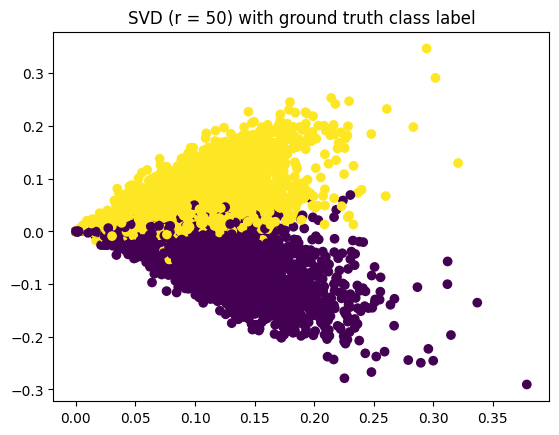

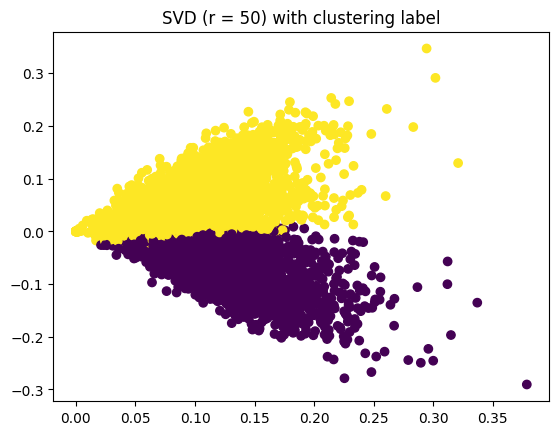

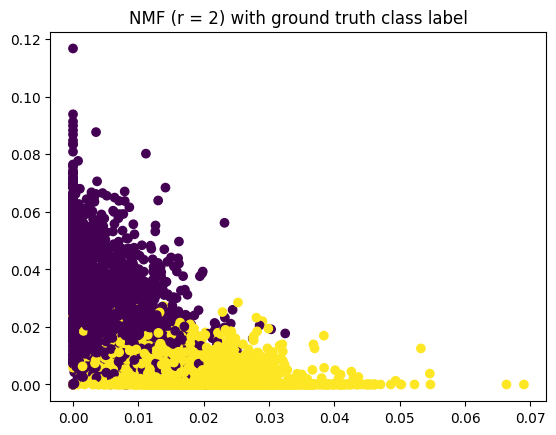

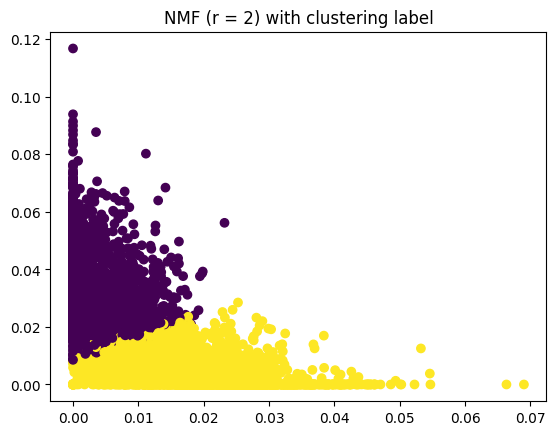

In [ ]:

svd_transformed_data = perform_svd(newsgroups_tfidf)
nmf_transformed_data = perform_nmf(newsgroups_tfidf)

plot_scatter(svd_transformed_data, label_kmeans, "SVD (r = 50) with ground truth class label")
plot_scatter(svd_transformed_data, kmeans.labels_, "SVD (r = 50) with clustering label")
plot_scatter(nmf_transformed_data, label_kmeans, "NMF (r = 2) with ground truth class label")
plot_scatter(nmf_transformed_data, kmeans.labels_, "NMF (r = 2) with clustering label")

***Question 9***

The aforementioned graphs reveal a striking similarity between the clustered labels and the actual group labels. Nevertheless, the genuine group labels exhibit a greater level of overlap, a nuance not distinctly evident in the labeling graphs generated by NMF and SVD, where labeling boundaries are more clearly defined. The data portrays a triangular distribution rather than a spherical one, with centroids of individual labels closely positioned. Simultaneously, outliers are present at a considerable distance from the primary clusters. Given that K-Means clustering assumes a spherical data distribution, this non-spherical data distribution poses a suboptimal scenario.

### 3. Clustering of the Entire 20 Classes


***Question 10***

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

# Load the dataset
news_dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))

def load_and_transform_dataset(min_df=3):

    # Create CountVectorizer and TfidfTransformer
    vectorizer = CountVectorizer(stop_words="english", min_df=min_df)
    transformer = TfidfTransformer(use_idf=True)

    # Transform the text data
    word_count_matrix = vectorizer.fit_transform(news_dataset.data)
    tfidf_matrix = transformer.fit_transform(word_count_matrix)
    tfidf_array = tfidf_matrix.toarray()

    # Get feature names from CountVectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame with the transformed data
    tfidf_dataframe = pd.DataFrame(data=tfidf_array, columns=feature_names)

    return tfidf_dataframe

# Example usage
tfidf_dataframe = load_and_transform_dataset()
print(tfidf_dataframe.shape)


(18846, 45365)


In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

def calculate_best_svd_score(r_values, data, kmeans_clusters, target_labels):
    best_score_svd = 0
    best_r_svd = 0

    for r in r_values:
        print(r)
        svd_model = TruncatedSVD(n_components=r, random_state=42)
        svd_features = svd_model.fit_transform(data)
        kmeans_clusters.fit(svd_features)

        hs = homogeneity_score(target_labels, kmeans_clusters.labels_)
        cs = completeness_score(target_labels, kmeans_clusters.labels_)
        vms = v_measure_score(target_labels, kmeans_clusters.labels_)
        aris = adjusted_rand_score(target_labels, kmeans_clusters.labels_)
        amis = adjusted_mutual_info_score(target_labels, kmeans_clusters.labels_)

        avg_svd_score = (hs + cs + vms + aris + amis) / 5

        print('Average Score: ' + str(avg_svd_score))

        if avg_svd_score > best_score_svd:
            best_score_svd = avg_svd_score
            best_r_svd = r

    return best_r_svd, best_score_svd

num_components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
kmeans_cluster_model = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)

best_r_svd, best_svd_score = calculate_best_svd_score(num_components, tfidf_dataframe, kmeans_cluster_model, news_dataset.target)

print('Best r in terms of average score: ' + str(best_r_svd))
print('Best SVD Score: ' + str(best_svd_score))


1
Average Score: 0.020699099772092347
2
Average Score: 0.1866356606182337
3
Average Score: 0.2210624664991326
5
Average Score: 0.2933199644577881
10
Average Score: 0.29342498645198073
20
Average Score: 0.30886229818530025
50
Average Score: 0.30086532474510075
100
Average Score: 0.30106677274936217
300
Average Score: 0.2783574580258681
Best r in terms of average score: 20
Best SVD Score: 0.30886229818530025


Homogeneity score for SVD (r = 20): 0.336158
Completeness score for SVD (r = 20): 0.378021
V-measure score for SVD (r = 20): 0.355862
Adjusted Rand Index score for SVD (r = 20): 0.120619
Adjusted mutual information score for SVD (r = 20): 0.353652


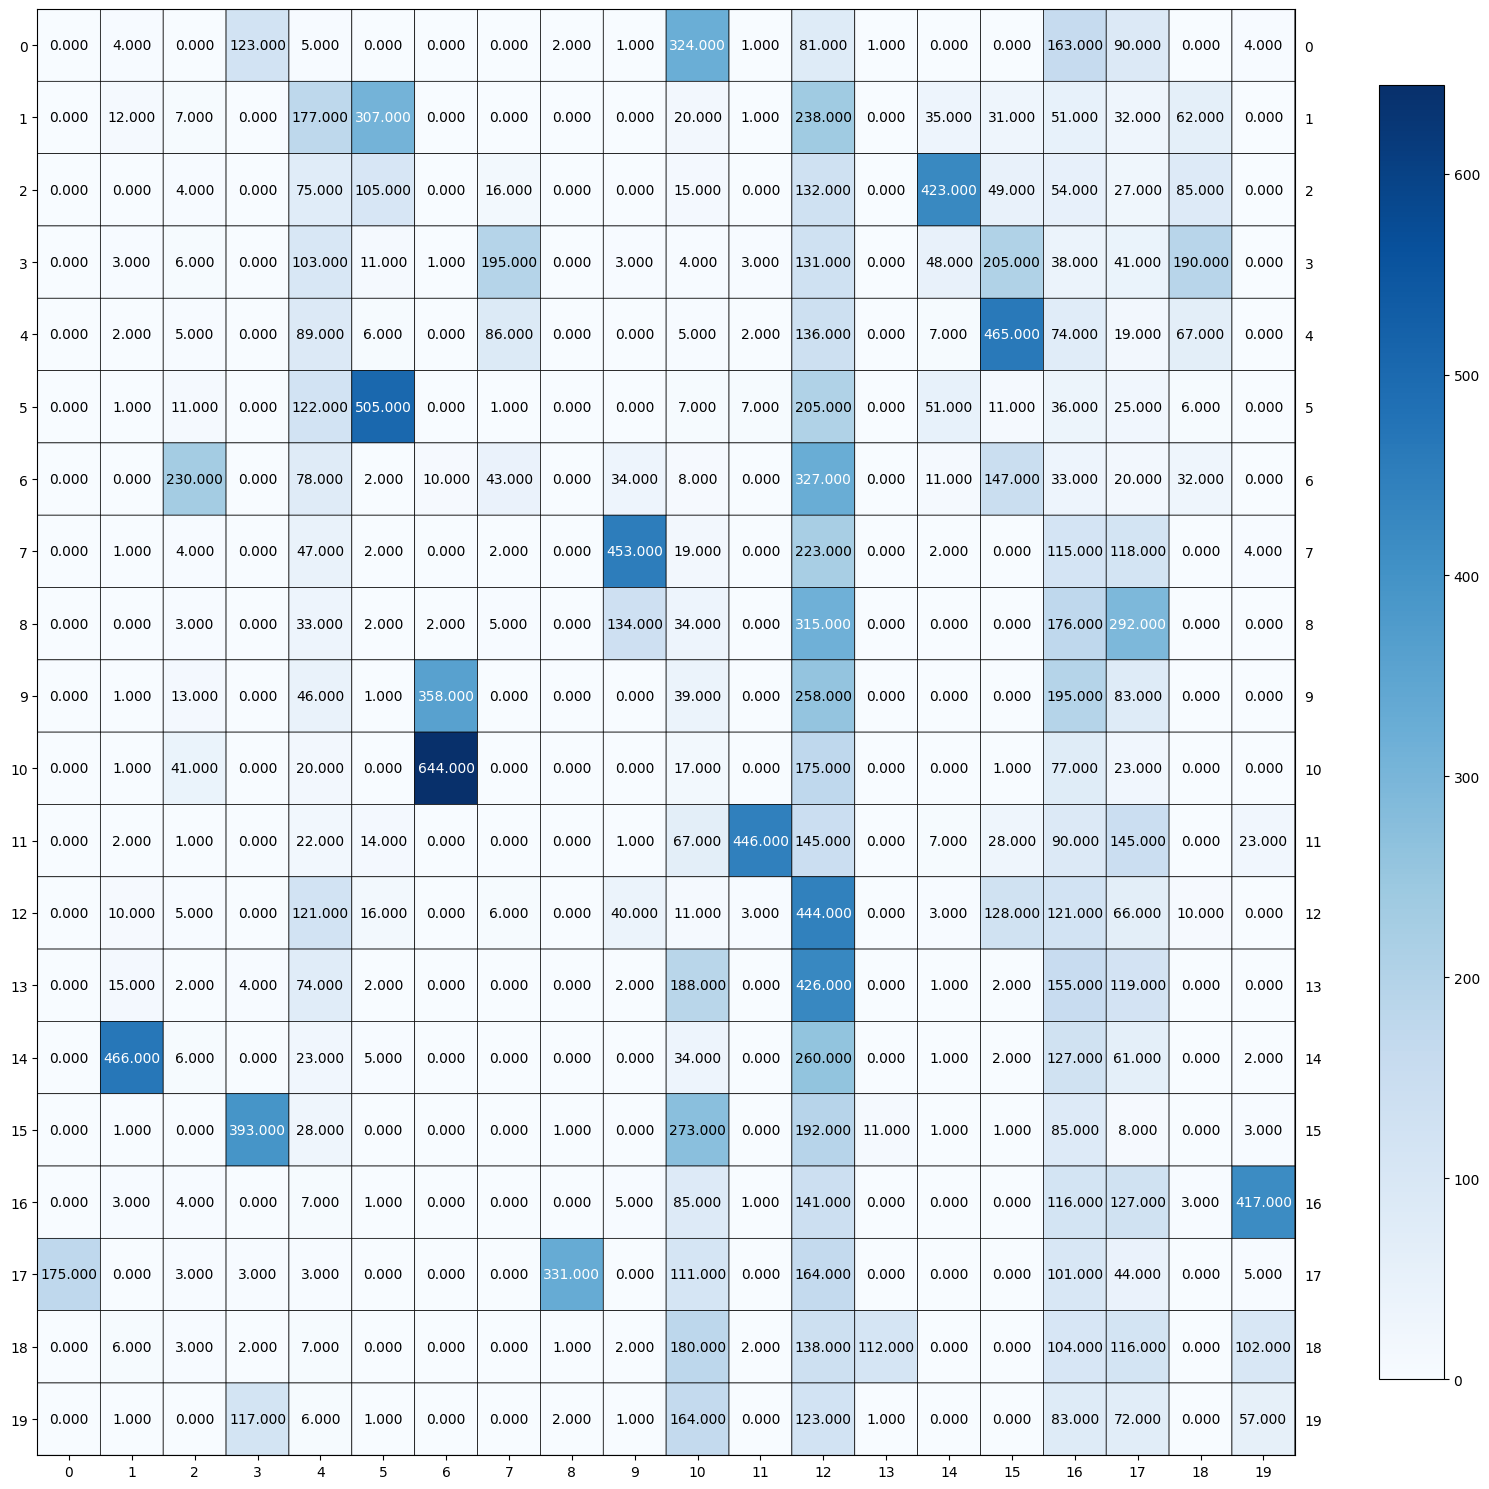

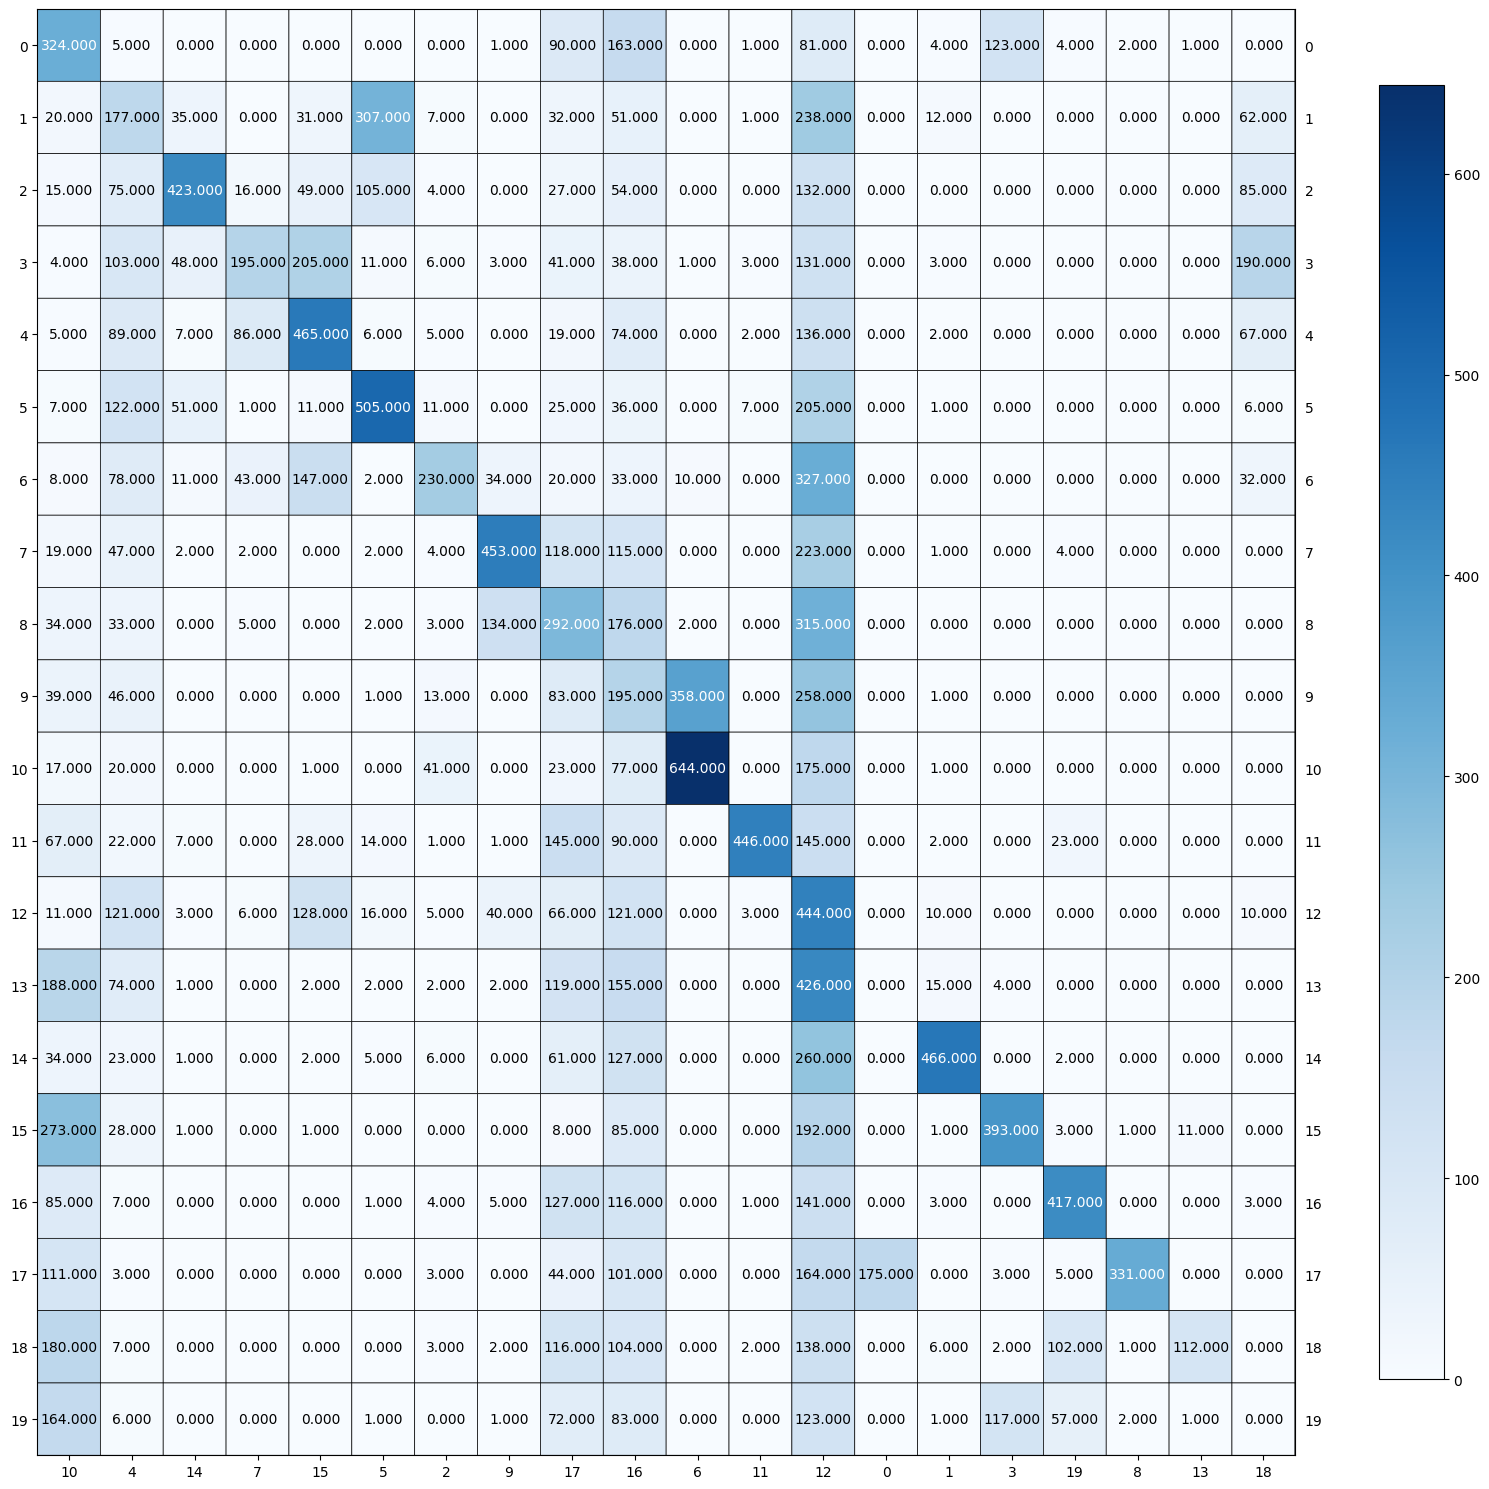

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
)
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics.cluster import contingency_matrix

def apply_svd_and_kmeans(data, num_components, kmeans_model):
    svd_transformer = TruncatedSVD(n_components=num_components, random_state=42)
    svd_features = svd_transformer.fit_transform(data)
    kmeans_model.fit(svd_features)

def evaluate_clustering_metrics(y_test, y_pred, name=""):
    print("Homogeneity score for %s: %f" % (name, homogeneity_score(y_test, y_pred)))
    print("Completeness score for %s: %f" % (name, completeness_score(y_test, y_pred)))
    print("V-measure score for %s: %f" % (name, v_measure_score(y_test, y_pred)))
    print("Adjusted Rand Index score for %s: %f" % (name, adjusted_rand_score(y_test, y_pred)))
    print("Adjusted mutual information score for %s: %f" % (name, adjusted_mutual_info_score(y_test, y_pred)))


def visualize_confusion_matrix(target_labels, predicted_labels):
    cm = confusion_matrix(target_labels, predicted_labels)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15, 15))

# R = 20 - Average Score
svd_r = 20
svd_model = TruncatedSVD(n_components=svd_r, random_state=42)
words_count_svd = svd_model.fit_transform(tfidf_dataframe)

kmeans_model = KMeans(init='k-means++', max_iter=1000, n_clusters=20, n_init=30, random_state=0)
apply_svd_and_kmeans(tfidf_dataframe, svd_r, kmeans_model)

# Evaluate metrics
evaluate_clustering_metrics(news_dataset.target, kmeans_model.labels_, name="SVD (r = {})".format(svd_r))

# Visualize confusion matrix
plot_mat(contingency_matrix(news_dataset.target, kmeans_model.labels_), size = (15,15))
visualize_confusion_matrix(news_dataset.target, kmeans_model.labels_)


In [ ]:

from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
)
num_components = [1, 2, 3, 5, 10, 20, 50, 100, 300]
def calculate_best_nmf(components, data, target_labels, n_clusters=20, random_state=0):
    best_nmf_score = 0
    best_nmf_r = 0

    kmeans_model = KMeans(init='k-means++', max_iter=100000, n_clusters=n_clusters, n_init=30, random_state=random_state)

    for r in components:
        nmf_model = NMF(n_components=r, init='random', random_state=random_state, max_iter=100000)
        words_count_nmf = nmf_model.fit_transform(data)
        kmeans_model.fit(words_count_nmf)

        hs = homogeneity_score(target_labels, kmeans_model.labels_)
        cs = completeness_score(target_labels, kmeans_model.labels_)
        vms = v_measure_score(target_labels, kmeans_model.labels_)
        aris = adjusted_rand_score(target_labels, kmeans_model.labels_)
        amis = adjusted_mutual_info_score(target_labels, kmeans_model.labels_)

        avg_score = (hs + cs + vms + aris + amis) / 5

        if avg_score > best_nmf_score:
            best_nmf_score = avg_score
            best_nmf_r = r

        print('Component ' + str(r) + ', ' + 'Average Score: ' + str(avg_score))

    return best_nmf_r, best_nmf_score

best_r_nmf, best_score_nmf = calculate_best_nmf(num_components, tfidf_dataframe, news_dataset.target)

print('Best r for NMF: ' + str(best_r_nmf))
print('Best NMF Score: ' + str(best_score_nmf))


Component 1, Average Score: 0.02076162215956203
Component 2, Average Score: 0.1699054207666734
Component 3, Average Score: 0.20177601465736045
Component 5, Average Score: 0.2396382853881612
Component 10, Average Score: 0.2650333039858369
Component 20, Average Score: 0.2627086703407877
Component 50, Average Score: 0.23521298076051372
Component 100, Average Score: 0.14074921062990936
Component 300, Average Score: 0.05024577283103636
Best r for NMF: 10
Best NMF Score: 0.2650333039858369


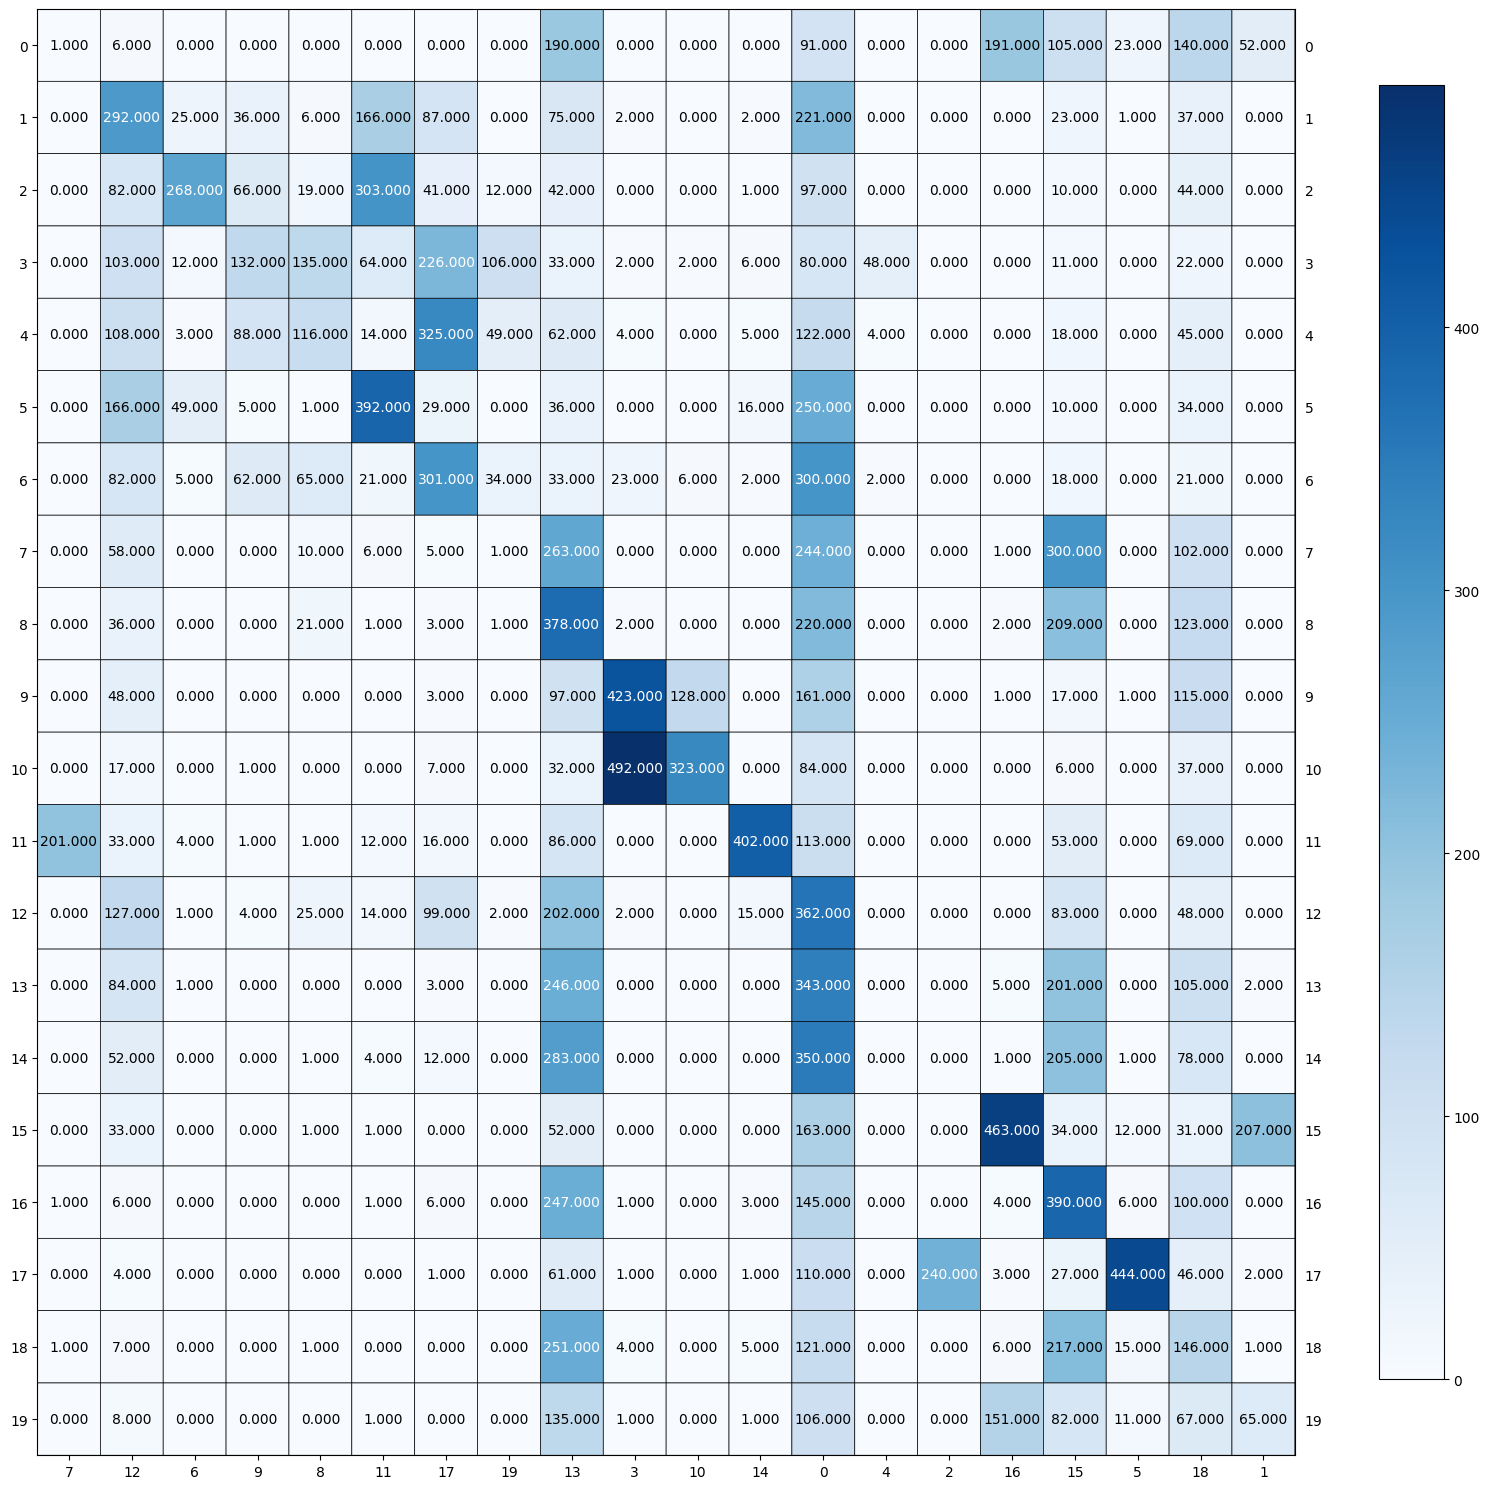

Homogeneity score for : 0.301093
Completeness score for : 0.346081
V-measure score for : 0.322023
Adjusted Rand Index score for : 0.101485
Adjusted mutual information score for : 0.319661


In [ ]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
)
def cluster_and_visualize(data, n_components, n_clusters=20, random_state=42):
    nmf_model = NMF(n_components=n_components, init='random', random_state=random_state, max_iter=1000000)
    words_count_nmf = nmf_model.fit_transform(data)

    kmeans_model = KMeans(init='k-means++', max_iter=1000000, n_clusters=n_clusters, n_init=30, random_state=0)
    kmeans_model.fit(words_count_nmf)

    confusion_mat = confusion_matrix(news_dataset.target, kmeans_model.labels_)
    rows, cols = linear_sum_assignment(confusion_mat, maximize=True)
    plot_mat(confusion_mat[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15, 15))

    print("Homogeneity score for %s: %f" % ("", homogeneity_score(news_dataset.target, kmeans_model.labels_)))
    print("Completeness score for %s: %f" % ("",  completeness_score(news_dataset.target, kmeans_model.labels_)))
    print("V-measure score for %s: %f" % ("",  v_measure_score(news_dataset.target, kmeans_model.labels_)))
    print("Adjusted Rand Index score for %s: %f" % ("",  adjusted_rand_score(news_dataset.target, kmeans_model.labels_)))
    print("Adjusted mutual information score for %s: %f" % ("",  adjusted_mutual_info_score(news_dataset.target, kmeans_model.labels_)))

# Usage
cluster_and_visualize(tfidf_dataframe, 10)


### 4. UMAP

***Question 11***


In [ ]:
!pip uninstall umap
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=003673ab528446a0aa5477b9d9a77a5e70a2feffedb74182b62139d46f7ba3ca
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn



UMAP Results using cosine & n_components = 5: 


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity score: 0.5689113781606602
Completeness score: 0.58788157752841
V-measure score: 0.5782409320909574
Adjusted Rand Index score: 0.4524382375325882
Adjusted Mutual Information score: 0.5768448624199578


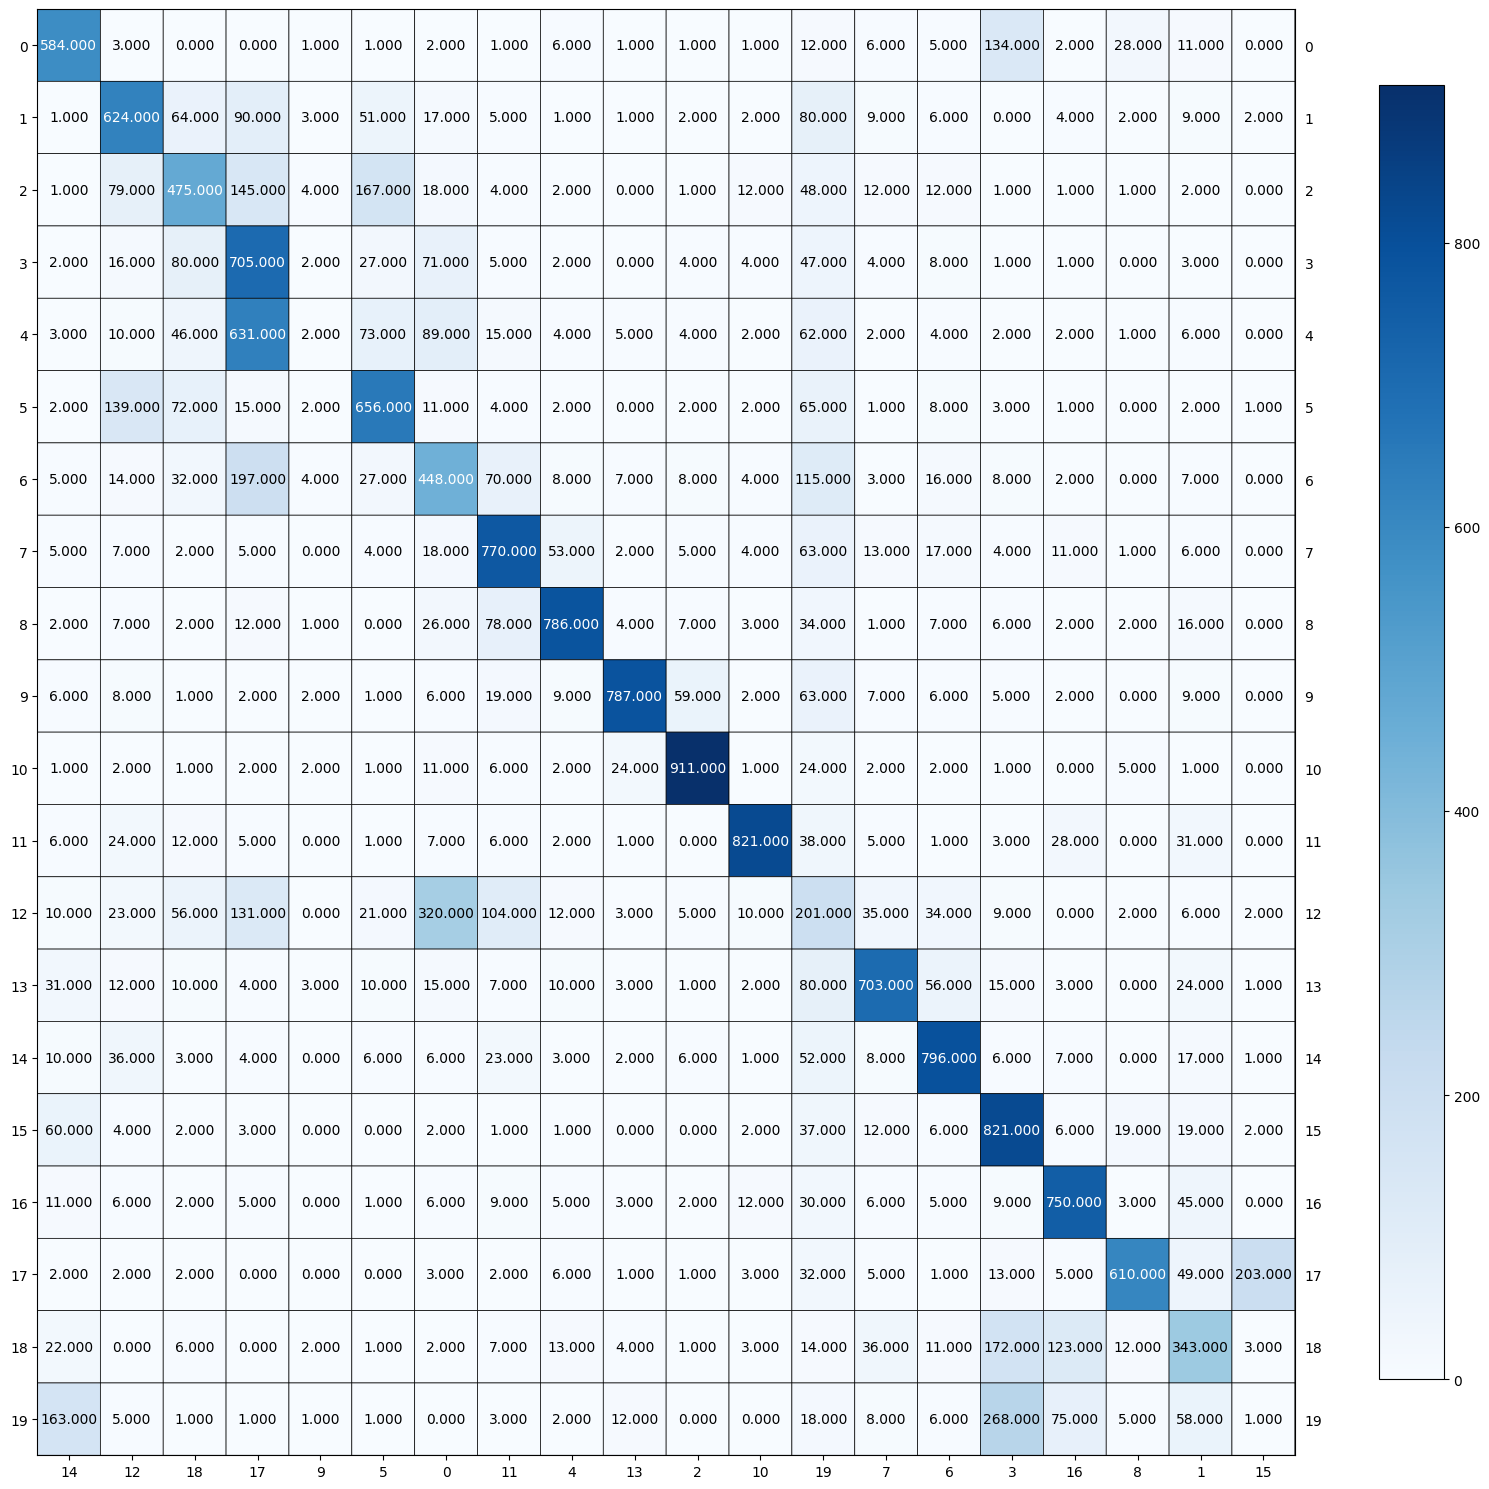


UMAP Results using cosine & n_components = 20: 


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity score: 0.5639415097627272
Completeness score: 0.5837578263288667
V-measure score: 0.5736785925777276
Adjusted Rand Index score: 0.44416336630818326
Adjusted Mutual Information score: 0.5722660045491073


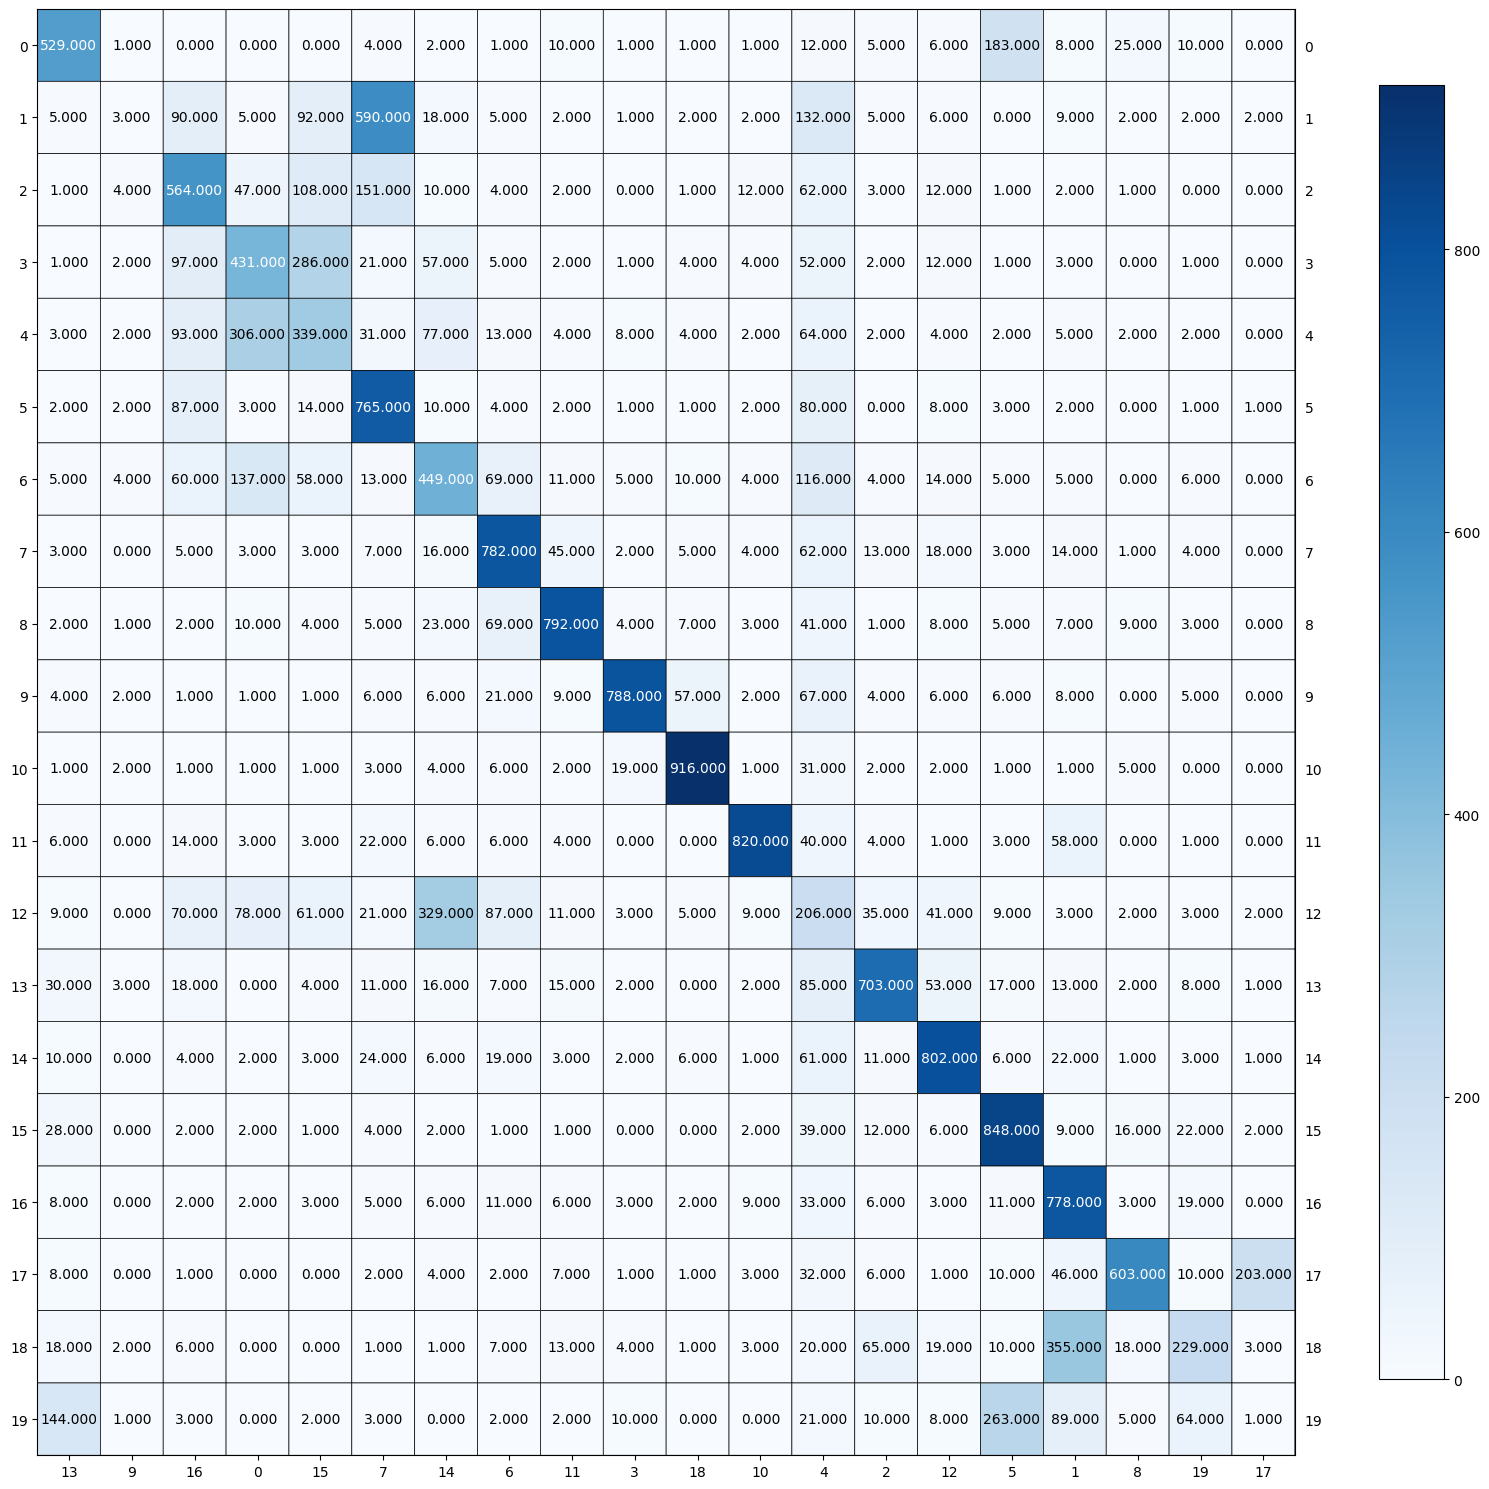


UMAP Results using cosine & n_components = 200: 


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity score: 0.5653100153929963
Completeness score: 0.5854613870627202
V-measure score: 0.5752092640226476
Adjusted Rand Index score: 0.44481434747002424
Adjusted Mutual Information score: 0.5738014235314004


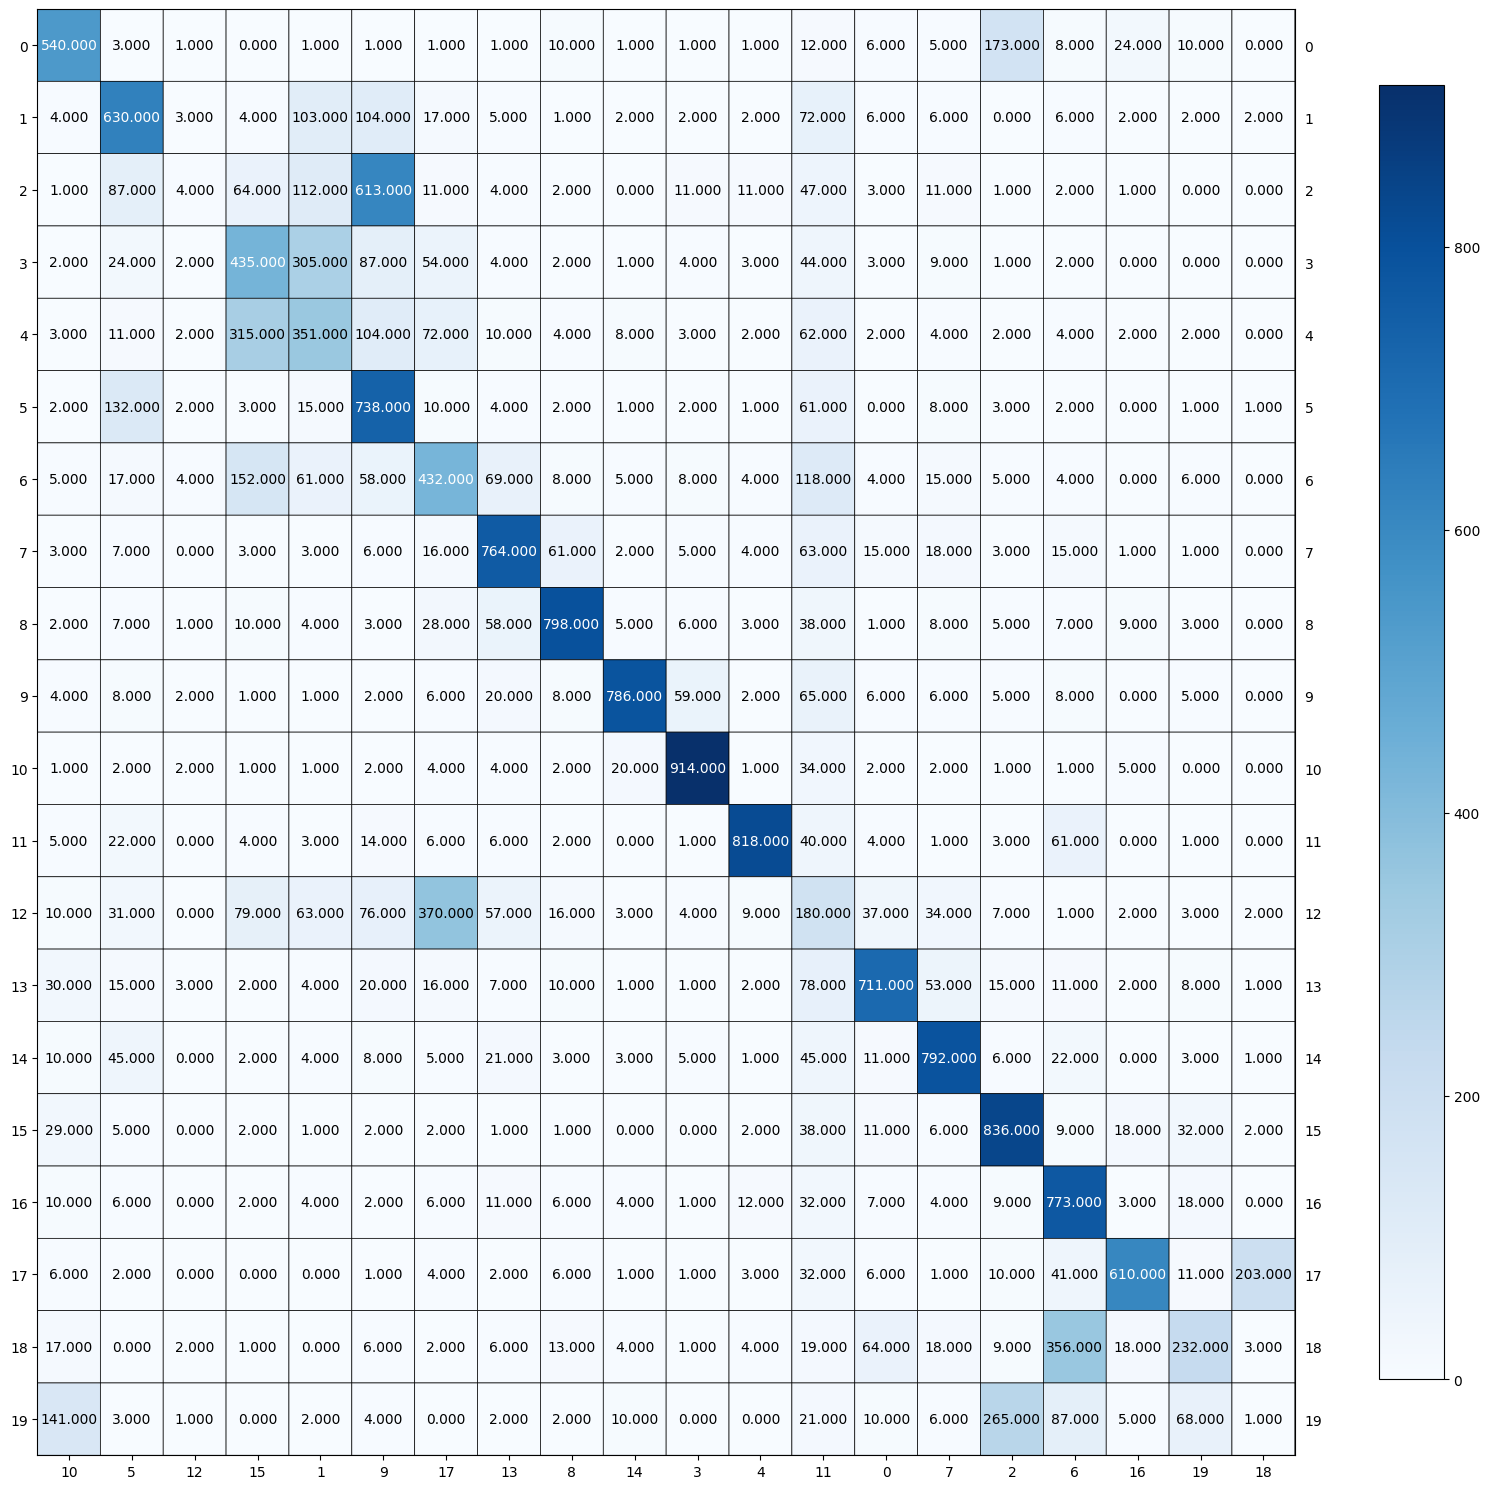


UMAP Results using euclidean & n_components = 5: 


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity score: 0.0067302586803309776
Completeness score: 0.006786437747219485
V-measure score: 0.006758231466033897
Adjusted Rand Index score: 0.0013768191959116626
Adjusted Mutual Information score: 0.003539773605795946


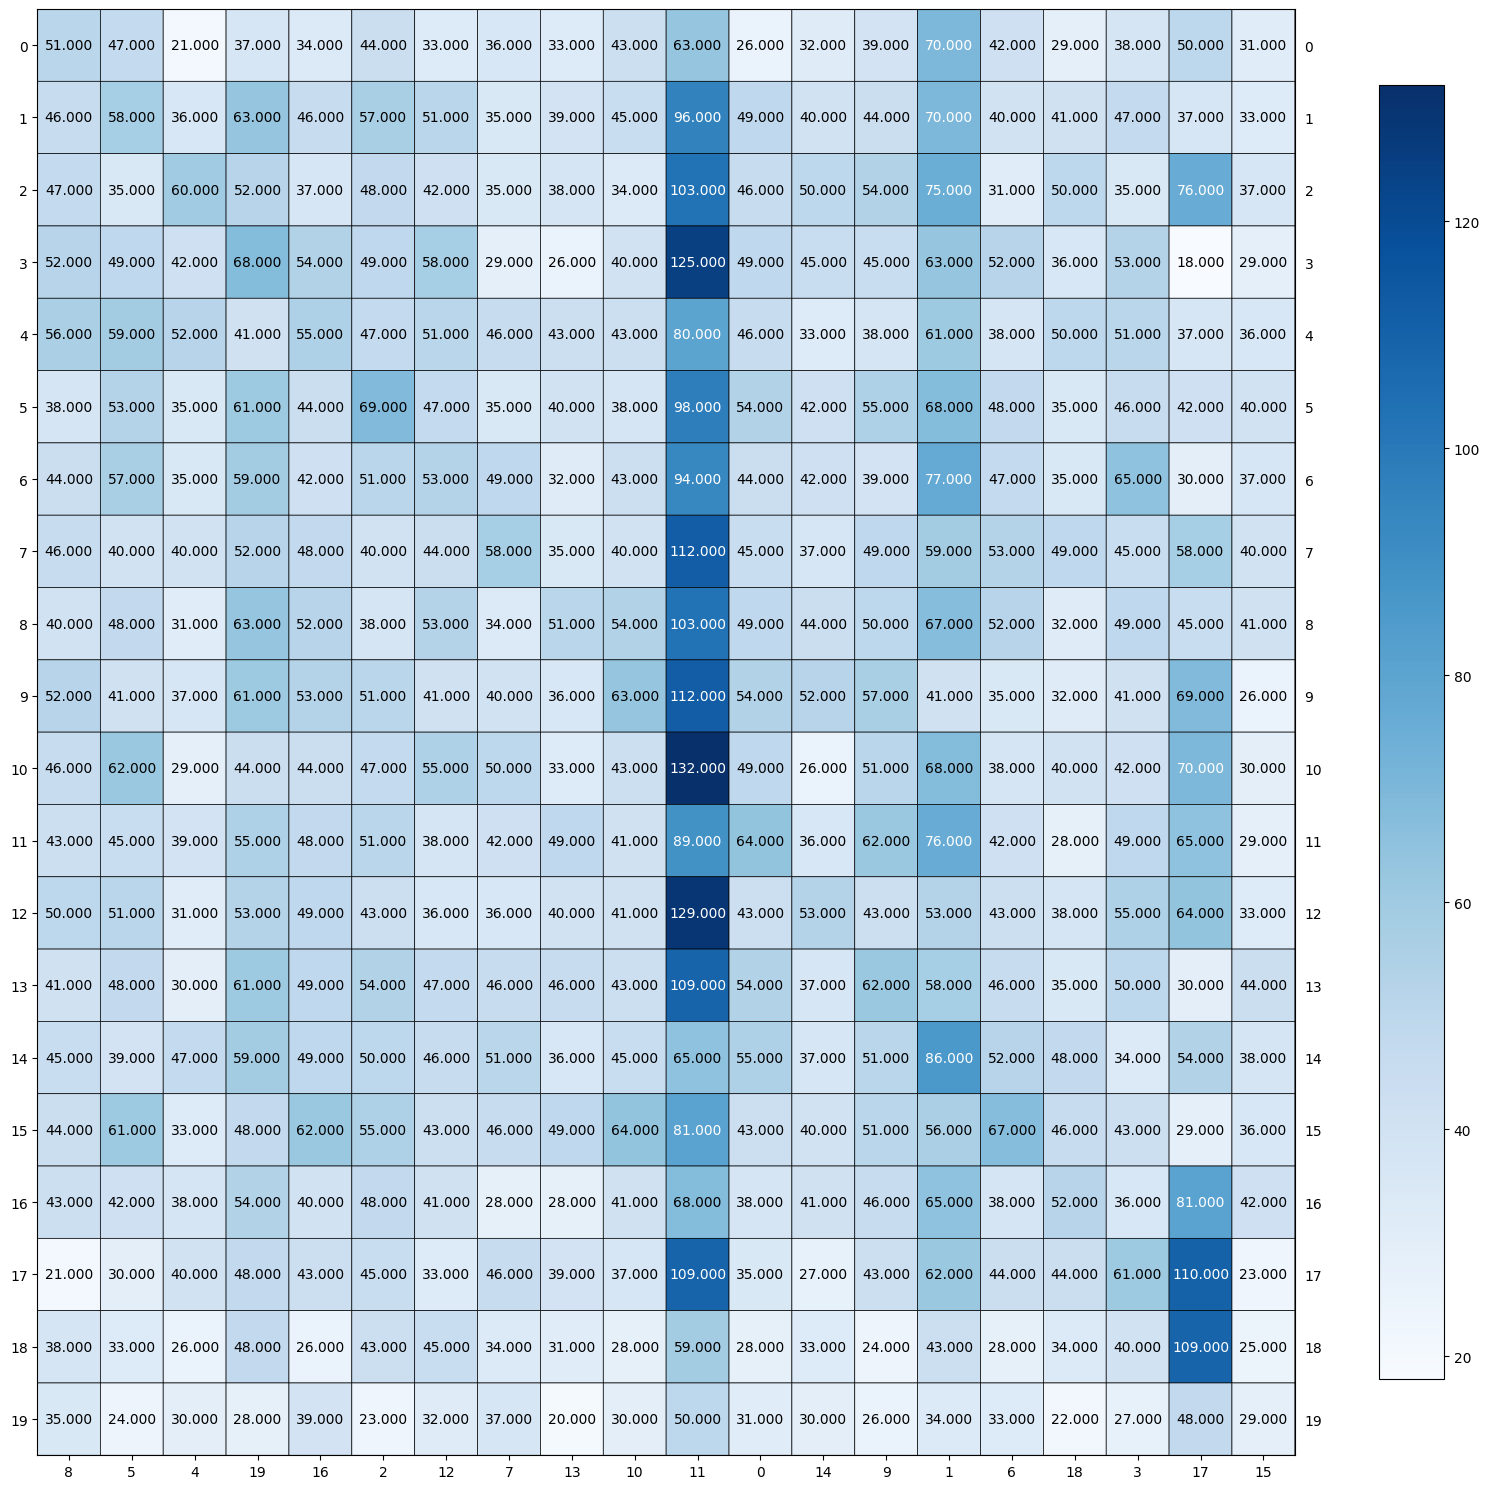


UMAP Results using euclidean & n_components = 20: 


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity score: 0.006631022103980117
Completeness score: 0.006661118524906376
V-measure score: 0.006646036241881955
Adjusted Rand Index score: 0.0013476182034869316
Adjusted Mutual Information score: 0.0034335506302220183


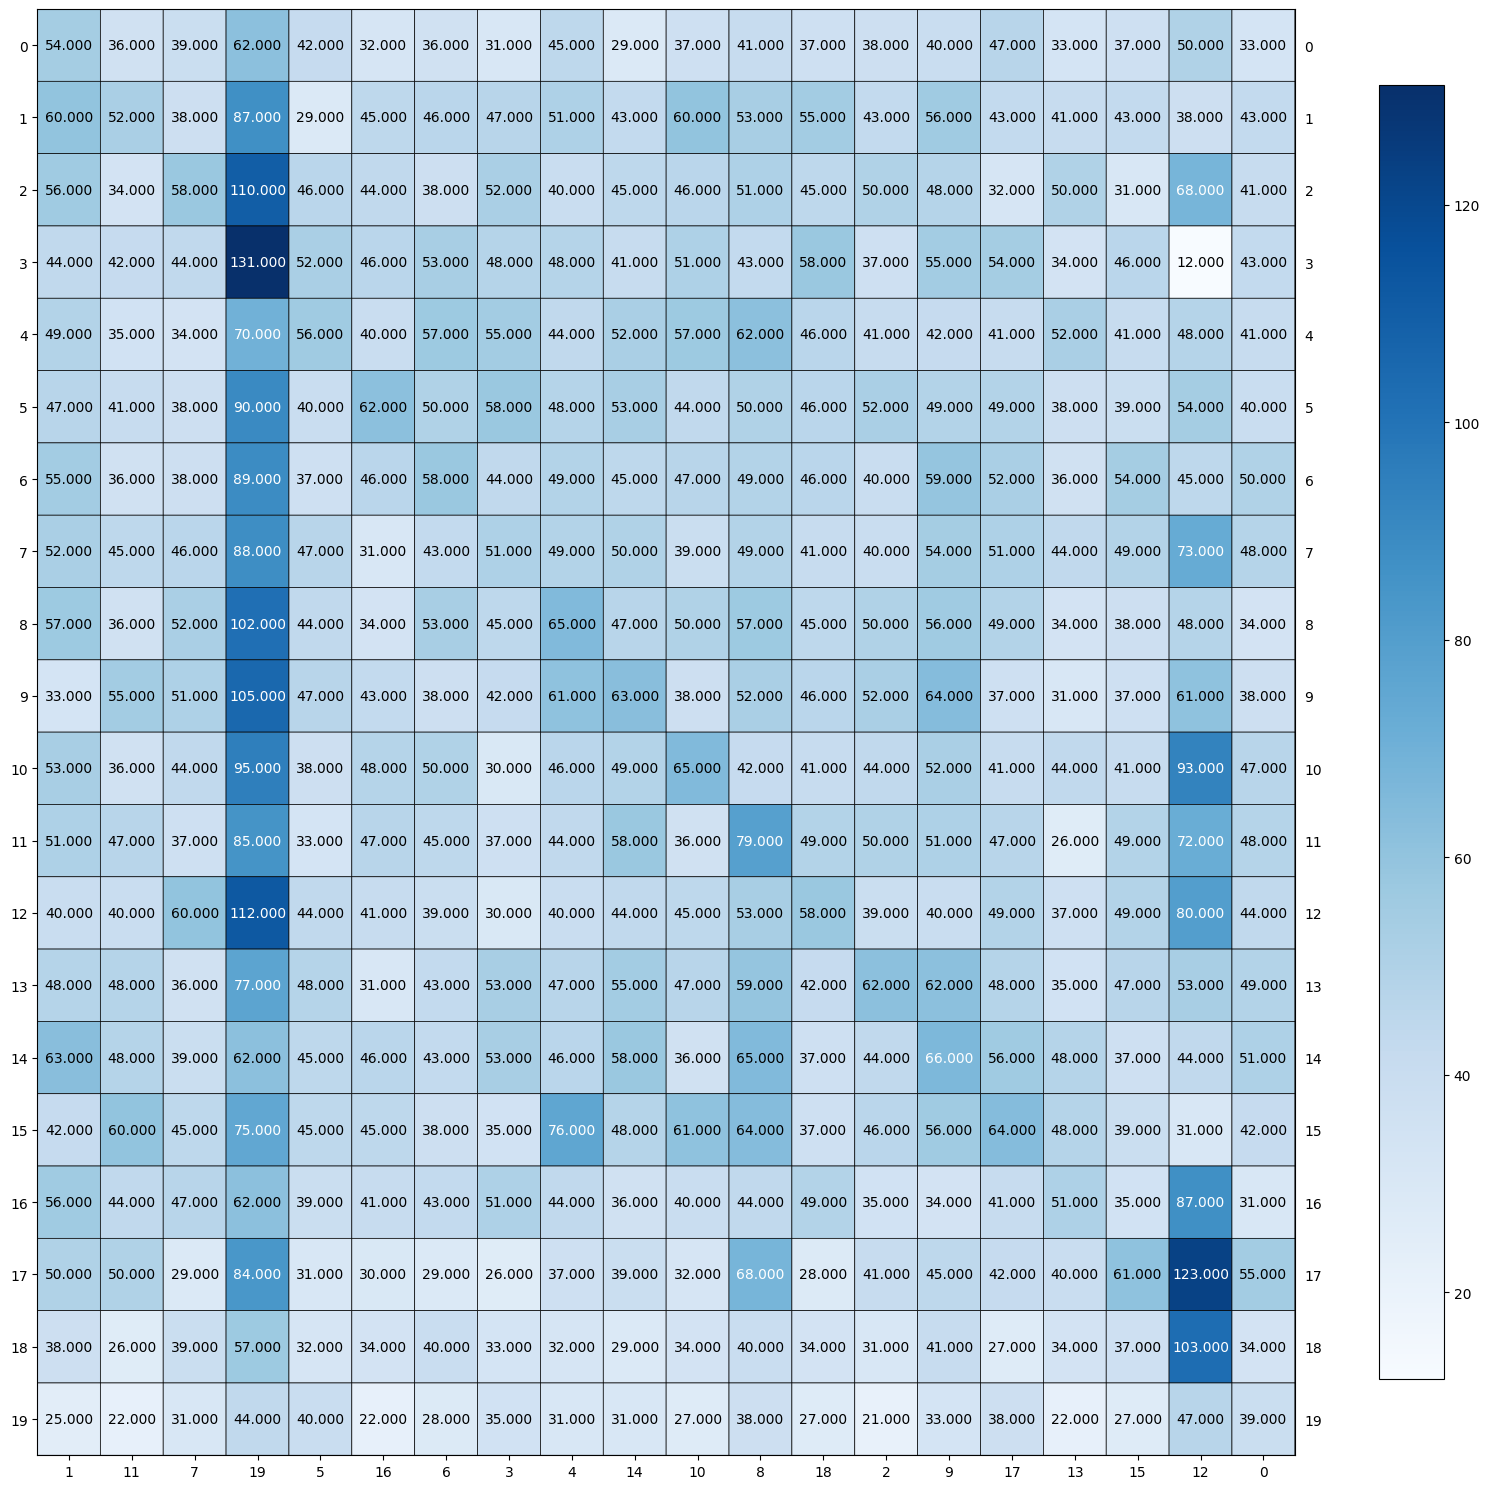


UMAP Results using euclidean & n_components = 200: 


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity score: 0.0061866039151025854
Completeness score: 0.006471681862863335
V-measure score: 0.006325932760940151
Adjusted Rand Index score: 0.000992228114740771
Adjusted Mutual Information score: 0.003051160084403079


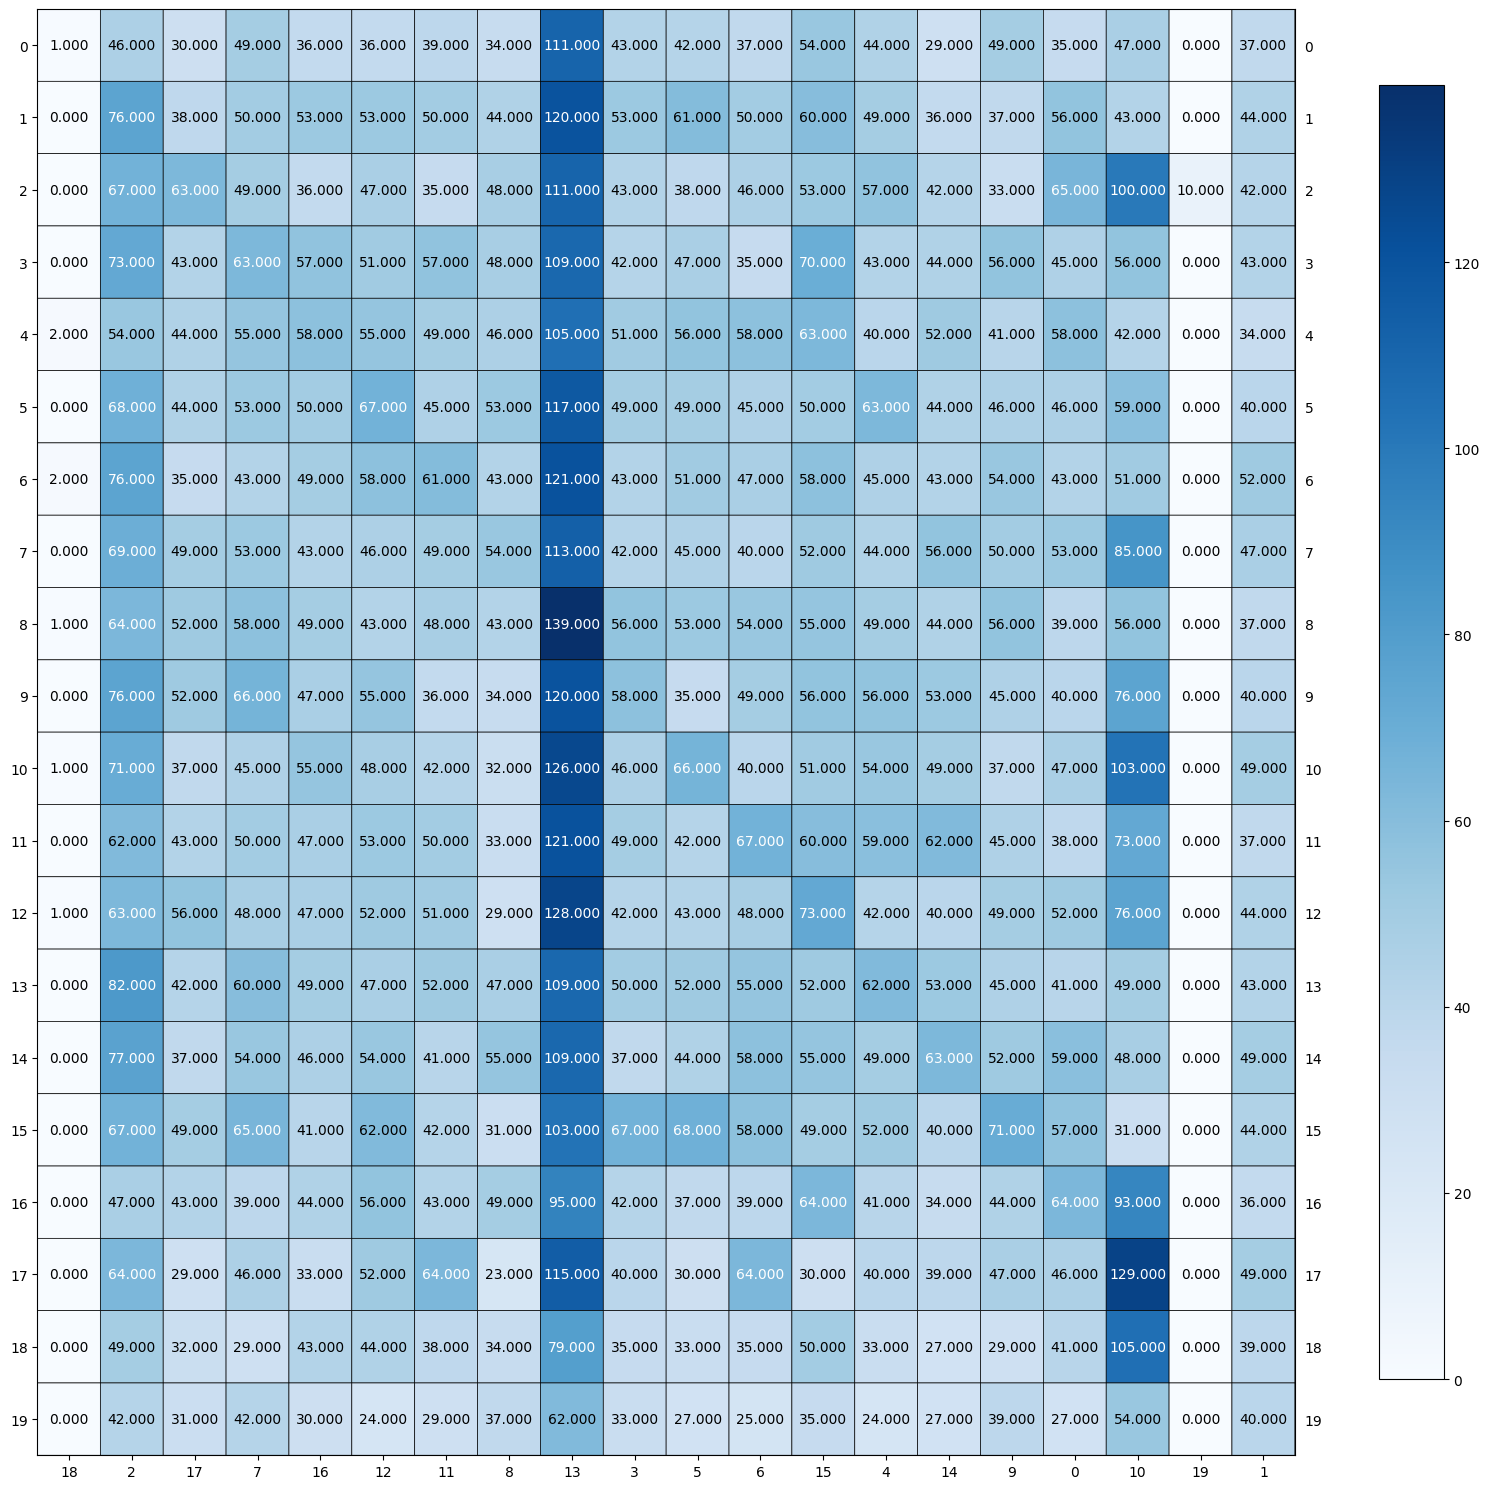

In [ ]:
import umap.umap_ as umap
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

def run_umap_and_kmeans(tfidf_data, target_labels, distance_metric, n_components, n_clusters=20):
    print(f'\nUMAP Results using {distance_metric} & n_components = {n_components}: ')
    umap_model = umap.UMAP(n_components=n_components, metric=distance_metric, random_state=0)
    umap_transformed = umap_model.fit_transform(tfidf_data)

    kmeans_clusterer = KMeans(random_state=0, n_clusters=n_clusters, max_iter=1000, n_init=30)
    kmeans_clusterer.fit(umap_transformed)

    print_cluster_metrics(target_labels, kmeans_clusterer.labels_)
    plot_confusion_matrix(target_labels, kmeans_clusterer.labels_)

def print_cluster_metrics(y_true, y_pred):
    print("Homogeneity score:", homogeneity_score(y_true, y_pred))
    print("Completeness score:", completeness_score(y_true, y_pred))
    print("V-measure score:", v_measure_score(y_true, y_pred))
    print("Adjusted Rand Index score:", adjusted_rand_score(y_true, y_pred))
    print("Adjusted Mutual Information score:", adjusted_mutual_info_score(y_true, y_pred))

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15, 15))

# Run UMAP for different parameters and metrics
umap_params_list = [(5, 'cosine'), (20, 'cosine'), (200, 'cosine'), (5, 'euclidean'), (20, 'euclidean'), (200, 'euclidean')]
for n_components_value, distance_metric_value in umap_params_list:
    run_umap_and_kmeans(tfidf_dataframe, news_dataset.target, distance_metric_value, n_components_value)


***Question 12***

the first part highlights the superior performance of UMAP in dimensionality reduction, particularly when using the cosine metric. The robust diagonals in the contingency matrix and elevated metrics across various n_components emphasize its ability to achieve enhanced cluster separation compared to SVD/PCA and NMF. The selection of n_components=5, based on the highest V-score, is deemed optimal.

Conversely, the second part focuses on the suboptimal performance of UMAP dimensionality reduction with the Euclidean metric, indicated by low scores across homogeneity, completeness, v-measure, and adjusted random index for all n_component values. Despite its general unsuitability, the optimal setting is n_components=5, as observed in the confusion matrix, showing slightly improved cluster creation compared to other n_component values.

In conclusion, the cosine metric with n_components=5 remains the preferred choice for UMAP.

***Question 13***

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import cluster
kmeans = KMeans(random_state=0, n_clusters=20, max_iter=1000, n_init=30)
kmeans.fit(tfidf_dataframe)




KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

In [ ]:
print("Homogeneity: ", cluster.homogeneity_score(news_dataset.target, kmeans.labels_))
print("Completeness: ",cluster. completeness_score(news_dataset.target, kmeans.labels_))
print("V-measure: ", cluster.v_measure_score(news_dataset.target, kmeans.labels_))
print("Adjusted Rand-Index: ", cluster.adjusted_rand_score(news_dataset.target, kmeans.labels_))
print("Adjusted Mutual Information Score: ", cluster.adjusted_mutual_info_score(news_dataset.target, kmeans.labels_))

Homogeneity:  0.326807011612208
Completeness:  0.3743410597965642
V-measure:  0.3489627599775251
Adjusted Rand-Index:  0.11489276920106191
Adjusted Mutual Information Score:  0.3467089692894358


## Clustering Algorithms that do not explicitly rely on the Gaussian distribution per cluster

# Question 14-18

In [ ]:
!pip install regex
!pip install nltk
!pip install sklearn
!pip uninstall umap
!pip install umap-learn
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel
!pip install hdbscan

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=45782579743fbc83adcf82c594b0bca823e51cd2aa9fab14256cfac59a56d1f5
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039299 sha256=e444d4e3363dbe2990532c197449231c417dc09dc1c7f6da79611b8a5ee24fb2
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
import numpy as np
import nltk, string
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sklearn
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd
import umap.umap_ as umap
from scipy.optimize import linear_sum_assignment
import hdbscan


def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)

    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)

    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)

    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)

    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)

    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)

    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()

    # thresh = mat.max() / 2

    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw, fontsize=10)

    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")

    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()


def load_and_transform_dataset(min_df=3):

    # Create CountVectorizer and TfidfTransformer
    vectorizer = CountVectorizer(stop_words="english", min_df=min_df)
    transformer = TfidfTransformer(use_idf=True)

    # Transform the text data
    word_count_matrix = vectorizer.fit_transform(news_dataset.data)
    tfidf_matrix = transformer.fit_transform(word_count_matrix)
    tfidf_array = tfidf_matrix.toarray()

    # Get feature names from CountVectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame with the transformed data
    tfidf_dataframe = pd.DataFrame(data=tfidf_array, columns=feature_names)

    return tfidf_dataframe


def print_cluster_metrics(y_true, y_pred):
    print("Homogeneity score:", homogeneity_score(y_true, y_pred))
    print("Completeness score:", completeness_score(y_true, y_pred))
    print("V-measure score:", v_measure_score(y_true, y_pred))
    print("Adjusted Rand Index score:", adjusted_rand_score(y_true, y_pred))
    print("Adjusted Mutual Information score:", adjusted_mutual_info_score(y_true, y_pred))


def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15, 15))


# Load the dataset
news_dataset = fetch_20newsgroups(subset = 'all',shuffle = True, random_state = 0,remove=('headers','footers'))

# Example usage
tfidf_dataframe = load_and_transform_dataset()

## Question 14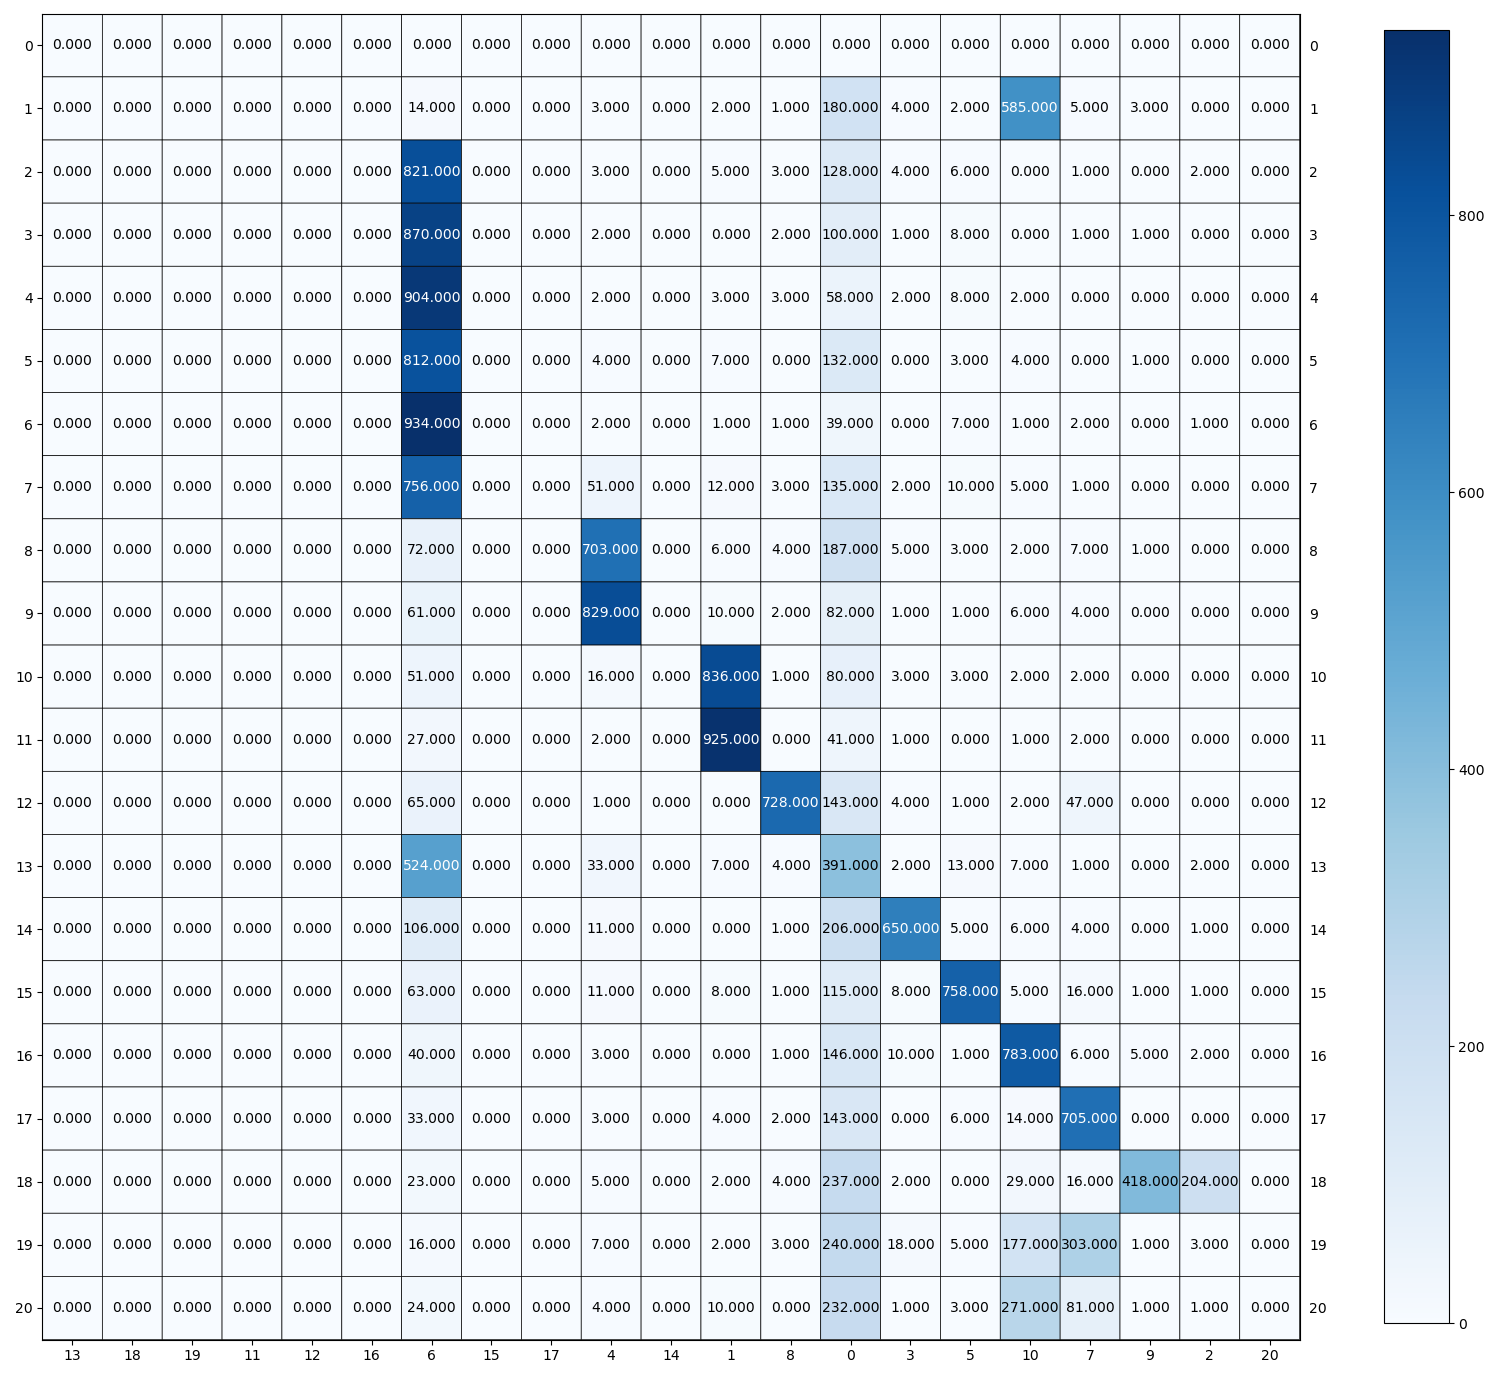

In [ ]:
# --------------------- Q14 ----------------------------------------------------------------------------------
umap_model = umap.UMAP(n_components=20, metric="cosine", random_state=0)
umap_data = umap_model.fit_transform(tfidf_dataframe)

agg_ward_clusterer = AgglomerativeClustering(n_clusters=20, linkage="ward")
agg_ward_clusterer.fit_predict(umap_data)

print("Ward: ")
print_cluster_metrics(news_dataset.target, agg_ward_clusterer.labels_)

agg_single_clusterer = AgglomerativeClustering(n_clusters=20, linkage="single")
agg_single_clusterer.fit_predict(umap_data)

print("Single: ")
print_cluster_metrics(news_dataset.target, agg_single_clusterer.labels_)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


* The five clustering evaluation metrics for "ward" and "single" linkage criteria are shown below:

> | linkage | Homogeneity | Completeness | V-measure | Adjusted Rand Index | Adjusted Mutual Information |
> | -----                 | ----- | ----- | ----- | ----- | ----- |
> | Ward   | 0.556 | 0.587 | 0.571 | 0.422 | 0.569 |
> | Single | 0.018 | 0.363 | 0.034 | 0.001 | 0.029 |

* We can see that "ward" linkage performs much better than "single".

## Question 15

In [ ]:
# --------------------- Q15 ----------------------------------------------------------------------------------
lst_components = [5, 20, 200]
lst_cluster_sizes = [20, 100, 200]
best_avg_score = 0
best_num_components = 0
best_min_cluster_size = 0
for num_components in lst_components:
    for min_cluster_size in lst_cluster_sizes:
        print("num_components: ", num_components, ", min_cluster_size: ", min_cluster_size)
        umap_model = umap.UMAP(n_components=num_components, metric="cosine", random_state=0)
        umap_data = umap_model.fit_transform(tfidf_dataframe)
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
        hdbscan_clusterer.fit_predict(umap_data)
        print_cluster_metrics(news_dataset.target, hdbscan_clusterer.labels_)
        avg_score = (homogeneity_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    completeness_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    v_measure_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, hdbscan_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_num_components = num_components
            best_min_cluster_size = min_cluster_size

print("best_num_components: ", best_num_components, " best_min_cluster_size: ", best_min_cluster_size)

* The simulation resuls for different num_components and min_cluster_size are shown below.
* We found that best parameter combinations is num_components=5, min_cluster_size=100.

> | num_components | min_cluster_size | Homogeneity | Completeness | V-measure | Adjusted Rand Index | Adjusted Mutual Information |
> | -----                 | ----- | ----- | ----- | ----- | ----- | ----- |
> | 5   | 20  | 0.429 | 0.443 | 0.436 | 0.077 | 0.423 |
> | 5   | 100 | 0.429 | 0.629 | 0.510 | 0.227 | 0.509 |
> | 5   | 200 | 0.419 | 0.614 | 0.498 | 0.219 | 0.497 |
> | 20  | 20  | 0.437 | 0.453 | 0.445 | 0.086 | 0.433 |
> | 20  | 100 | 0.418 | 0.627 | 0.502 | 0.232 | 0.501 |
> | 20  | 200 | 0.415 | 0.608 | 0.493 | 0.213 | 0.492 |
> | 200 | 20  | 0.424 | 0.445 | 0.435 | 0.075 | 0.422 |
> | 200 | 100 | 0.421 | 0.614 | 0.499 | 0.209 | 0.498 |
> | 200 | 200 | 0.412 | 0.611 | 0.490 | 0.208 | 0.489 |

## Question 16

In [ ]:
# --------------------- Q16 ----------------------------------------------------------------------------------
umap_model = umap.UMAP(n_components=5, metric="cosine", random_state=0)
umap_data = umap_model.fit_transform(tfidf_dataframe)

hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
hdbscan_clusterer.fit_predict(umap_data)

plot_confusion_matrix(news_dataset.target, hdbscan_clusterer.labels_)

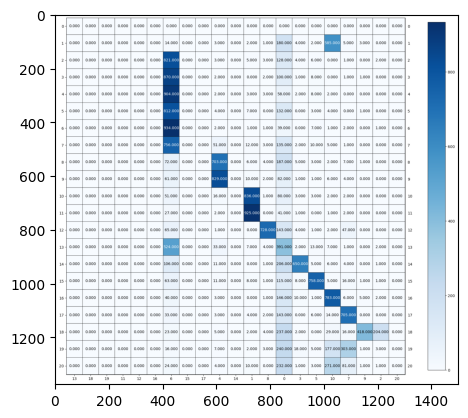

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = mpimg.imread("saved_result.png")
plt.imshow(images)
plt.show()

* The confusion matrix is shown above, we can see that there are 21 clusters.
* "-1" means that the data point has not been classified to any clusters.

### Question 17

In [ ]:
# --------------------- Q17 ----------------------------------------------------------------------------------
# --------------------- K-Means Only ---------------------
lst_k = [10, 20, 50]
best_avg_score = 0
best_k = 0
for k in lst_k:
    kmeans_clusterer = KMeans(n_clusters=k, max_iter=1000, n_init=30, random_state=0)
    kmeans_clusterer.fit(tfidf_dataframe)
    avg_score = (homogeneity_score(news_dataset.target, kmeans_clusterer.labels_) +
                completeness_score(news_dataset.target, kmeans_clusterer.labels_) +
                v_measure_score(news_dataset.target, kmeans_clusterer.labels_) +
                adjusted_rand_score(news_dataset.target, kmeans_clusterer.labels_) +
                adjusted_mutual_info_score(news_dataset.target, kmeans_clusterer.labels_)) / 5
    if (avg_score > best_avg_score):
        best_avg_score = avg_score
        best_k = k
print("--------------------- K-Means Only ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_k: ", best_k)

In [ ]:
# --------------------- Agglomerative Only ---------------------
agg_ward_clusterer = AgglomerativeClustering(n_clusters=20, linkage="ward")
agg_ward_clusterer.fit(tfidf_dataframe)
avg_score = (homogeneity_score(news_dataset.target, agg_ward_clusterer.labels_) +
            completeness_score(news_dataset.target, agg_ward_clusterer.labels_) +
            v_measure_score(news_dataset.target, agg_ward_clusterer.labels_) +
            adjusted_rand_score(news_dataset.target, agg_ward_clusterer.labels_) +
            adjusted_mutual_info_score(news_dataset.target, agg_ward_clusterer.labels_)) / 5
print("--------------------- Agglomerative Only ---------------------")
print("best_avg_score: ", avg_score)

In [ ]:
# --------------------- HDBSCAN Only ---------------------
lst_k = [100, 200]
best_avg_score = 0
best_k = 0
for k in lst_k:
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=k)
    hdbscan_clusterer.fit(tfidf_dataframe)
    avg_score = (homogeneity_score(news_dataset.target, hdbscan_clusterer.labels_) +
                completeness_score(news_dataset.target, hdbscan_clusterer.labels_) +
                v_measure_score(news_dataset.target, hdbscan_clusterer.labels_) +
                adjusted_rand_score(news_dataset.target, hdbscan_clusterer.labels_) +
                adjusted_mutual_info_score(news_dataset.target, hdbscan_clusterer.labels_)) / 5
    if (avg_score > best_avg_score):
        best_avg_score = avg_score
        best_k = k
print("--------------------- HDBSCAN Only ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_k: ", best_k)

In [ ]:
# --------------------- SVD + K-Means ---------------------
lst_r = [5, 20, 200]
lst_k = [10, 20, 50]
best_avg_score = 0
best_r = 0
best_k = 0
for r in lst_r:
    svd_model = TruncatedSVD(n_components=r, random_state=42)
    svd_data = svd_model.fit_transform(tfidf_dataframe)
    for k in lst_k:
        kmeans_clusterer = KMeans(n_clusters=k, max_iter=1000, n_init=30, random_state=0)
        kmeans_clusterer.fit(svd_data)
        avg_score = (homogeneity_score(news_dataset.target, kmeans_clusterer.labels_) +
                    completeness_score(news_dataset.target, kmeans_clusterer.labels_) +
                    v_measure_score(news_dataset.target, kmeans_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, kmeans_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, kmeans_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_r = r
            best_k = k
print("--------------------- SVD + K-Means ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)
print("best_k: ", best_k)

In [ ]:
# --------------------- SVD + Agglomerative ---------------------
lst_r = [5, 20, 200]
best_avg_score = 0
best_r = 0
for r in lst_r:
    svd_model = TruncatedSVD(n_components=r, random_state=42)
    svd_data = svd_model.fit_transform(tfidf_dataframe)
    agg_ward_clusterer = AgglomerativeClustering(n_clusters=20, linkage="ward")
    agg_ward_clusterer.fit(svd_data)
    avg_score = (homogeneity_score(news_dataset.target, agg_ward_clusterer.labels_) +
                completeness_score(news_dataset.target, agg_ward_clusterer.labels_) +
                v_measure_score(news_dataset.target, agg_ward_clusterer.labels_) +
                adjusted_rand_score(news_dataset.target, agg_ward_clusterer.labels_) +
                adjusted_mutual_info_score(news_dataset.target, agg_ward_clusterer.labels_)) / 5
    if (avg_score > best_avg_score):
        best_avg_score = avg_score
        best_r = r
print("--------------------- SVD + Agglomerative ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)

In [ ]:
# --------------------- SVD + HDBSCAN ---------------------
lst_r = [5, 20, 200]
lst_k = [100, 200]
best_avg_score = 0
best_r = 0
best_k = 0
for r in lst_r:
    svd_model = TruncatedSVD(n_components=r, random_state=42)
    svd_data = svd_model.fit_transform(tfidf_dataframe)
    for k in lst_k:
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=k)
        hdbscan_clusterer.fit(svd_data)
        avg_score = (homogeneity_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    completeness_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    v_measure_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, hdbscan_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_r = r
            best_k = k
print("--------------------- SVD + HDBSCAN ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)
print("best_k: ", best_k)

In [ ]:
# --------------------- NMF + K-Means ---------------------
lst_r = [5, 20, 200]
lst_k = [10, 20, 50]
best_avg_score = 0
best_r = 0
best_k = 0
for r in lst_r:
    nmf_model = NMF(n_components=r, random_state=42, max_iter=1000)
    nmf_data = nmf_model.fit_transform(tfidf_dataframe)
    for k in lst_k:
        kmeans_clusterer = KMeans(n_clusters=k, max_iter=1000, n_init=30, random_state=0)
        kmeans_clusterer.fit(nmf_data)
        avg_score = (homogeneity_score(news_dataset.target, kmeans_clusterer.labels_) +
                    completeness_score(news_dataset.target, kmeans_clusterer.labels_) +
                    v_measure_score(news_dataset.target, kmeans_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, kmeans_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, kmeans_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_k = k
            best_r = r
print("--------------------- NMF + K-Means ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_k: ", best_k)
print("best_r: ", best_r)

In [ ]:
# --------------------- NMF + Agglomerative ---------------------
lst_r = [5, 20, 200]
best_avg_score = 0
best_r = 0
for r in lst_r:
    nmf_model = NMF(n_components=r, random_state=42, max_iter=1000)
    nmf_data = nmf_model.fit_transform(tfidf_dataframe)
    agg_ward_clusterer = AgglomerativeClustering(n_clusters=20, linkage="ward")
    agg_ward_clusterer.fit(nmf_data)
    avg_score = (homogeneity_score(news_dataset.target, agg_ward_clusterer.labels_) +
                completeness_score(news_dataset.target, agg_ward_clusterer.labels_) +
                v_measure_score(news_dataset.target, agg_ward_clusterer.labels_) +
                adjusted_rand_score(news_dataset.target, agg_ward_clusterer.labels_) +
                adjusted_mutual_info_score(news_dataset.target, agg_ward_clusterer.labels_)) / 5
    if (avg_score > best_avg_score):
        best_avg_score = avg_score
        best_r = r
print("--------------------- NMF + Agglomerative ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)

In [ ]:
# --------------------- NMF + HDBSCAN ---------------------
lst_r = [5, 20, 200]
lst_k = [100, 200]
best_avg_score = 0
best_r = 0
best_k = 0
for r in lst_r:
    nmf_model = NMF(n_components=r, random_state=42, max_iter=1000)
    nmf_data = nmf_model.fit_transform(tfidf_dataframe)
    for k in lst_k:
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=k)
        hdbscan_clusterer.fit(nmf_data)
        avg_score = (homogeneity_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    completeness_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    v_measure_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, hdbscan_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_r = r
            best_k = k
print("--------------------- NMF + HDBSCAN ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)
print("best_k: ", best_k)

In [ ]:
# --------------------- UMAP + K-Means ---------------------
lst_r = [5, 20, 200]
lst_k = [10, 20, 50]
best_avg_score = 0
best_r = 0
best_k = 0
for r in lst_r:
    umap_model = umap.UMAP(n_components=r, metric="cosine", random_state=0)
    umap_data = umap_model.fit_transform(tfidf_dataframe)
    for k in lst_k:
        kmeans_clusterer = KMeans(n_clusters=k, max_iter=1000, n_init=30, random_state=0)
        kmeans_clusterer.fit(umap_data)
        avg_score = (homogeneity_score(news_dataset.target, kmeans_clusterer.labels_) +
                    completeness_score(news_dataset.target, kmeans_clusterer.labels_) +
                    v_measure_score(news_dataset.target, kmeans_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, kmeans_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, kmeans_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_k = k
            best_r = r
print("--------------------- UMAP + K-Means ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_k: ", best_k)
print("best_r: ", best_r)

In [ ]:
# --------------------- UMAP + Agglomerative ---------------------
lst_r = [5, 20, 200]
best_avg_score = 0
best_r = 0
for r in lst_r:
    umap_model = umap.UMAP(n_components=r, metric="cosine", random_state=0)
    umap_data = umap_model.fit_transform(tfidf_dataframe)
    agg_ward_clusterer = AgglomerativeClustering(n_clusters=20, linkage="ward")
    agg_ward_clusterer.fit(umap_data)
    avg_score = (homogeneity_score(news_dataset.target, agg_ward_clusterer.labels_) +
                completeness_score(news_dataset.target, agg_ward_clusterer.labels_) +
                v_measure_score(news_dataset.target, agg_ward_clusterer.labels_) +
                adjusted_rand_score(news_dataset.target, agg_ward_clusterer.labels_) +
                adjusted_mutual_info_score(news_dataset.target, agg_ward_clusterer.labels_)) / 5
    if (avg_score > best_avg_score):
        best_avg_score = avg_score
        best_r = r
print("--------------------- UMAP + Agglomerative ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)

In [ ]:
# --------------------- UMAP + HDBSCAN ---------------------
lst_r = [5, 20, 200]
lst_k = [100, 200]
best_avg_score = 0
best_r = 0
best_k = 0
for r in lst_r:
    umap_model = umap.UMAP(n_components=r, metric="cosine", random_state=0)
    umap_data = umap_model.fit_transform(tfidf_dataframe)
    for k in lst_k:
        hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=k)
        hdbscan_clusterer.fit(umap_data)
        avg_score = (homogeneity_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    completeness_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    v_measure_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_rand_score(news_dataset.target, hdbscan_clusterer.labels_) +
                    adjusted_mutual_info_score(news_dataset.target, hdbscan_clusterer.labels_)) / 5
        if (avg_score > best_avg_score):
            best_avg_score = avg_score
            best_r = r
            best_k = k
print("--------------------- UMAP + HDBSCAN ---------------------")
print("best_avg_score: ", best_avg_score)
print("best_r: ", best_r)
print("best_k: ", best_k)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


* The best combination is UMAP+K-means OR UMAP+Agglomerative, which is shown in the table below.

> | Dimensionality Reduction Method | Clustering Method | Best Average Score | Best r | Best k |
> | -----                | ----- | ----- | ----- | ----- |
> | None | K-Means       | 0.355 | -   | 50  |
> | None | Agglomerative | 0.343 | -   | -   |
> | None | HDBSCAN       | 0.2   | -   | 100 |
> | SVD  | K-Means       | 0.345 | 200 | 20  |
> | SVD  | Agglomerative | 0.335 | 20  | -   |
> | SVD  | HDBSCAN       | 0.2   | 5   | 100 |
> | NMF  | K-Means       | 0.304 | 50  | 20  |
> | NMF  | Agglomerative | 0.320 | 20  | -   |
> | NMF  | HDBSCAN       | 0.2   | 5   | 200 |
> | UMAP | K-Means       | 0.559 | 20  | 200 |
> | UMAP | Agglomerative | 0.559 | 200 | -   |
> | UMAP | HDBSCAN       | 0.461 | 5   | 100 |

# Part 2

### Question 19-*22*

*Question 19*

Although trained on different dataset, feature leaned by VGG, especially the earlier layers, are able to capture generic visual pattern like edges and textures, which are applicable in other mage datasets. The features, can be generalized and still have discriminative power for clustering and classification on custom datasets.


*Question 20*
The helper code perform extraction by load pertained VGG 16 network. Then iterate through the image in flower dataset,. Each image is passed through VGG16 network to get feature representations. It extract features from one of last fully connected layers of VGG16. After passing image thought convolutional layers and average pooling layer. The extracted features then stored.

*Question 21*
Original image is 224 by 224 as indicated in the helper code. so total 50176 pixels per image. VGG16 extracted from one of its last fully connected layers, and result in feature vector with dimension of 4096 for each image, as indicated in starter.


*Question 22*
Extracted features from VGG are dense, which contains values for almost evert element. The features from TF-IDF are sparse features, and this means a lot of elements are 0. VGG features, each element usually contains non zero values, representing different learned visual patterns among images.


```
```



### Question 13-25

Codes for q23:

In [ ]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            self.pooling = vgg.avgpool
            self.flatten = nn.Flatten()
            self.fc = vgg.classifier[0]

        def forward(self, x):
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out)
            return out

    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 117MB/s]
100%|██████████| 58/58 [00:39<00:00,  1.46it/s]


In [ ]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

(3670, 4096) (3670,)


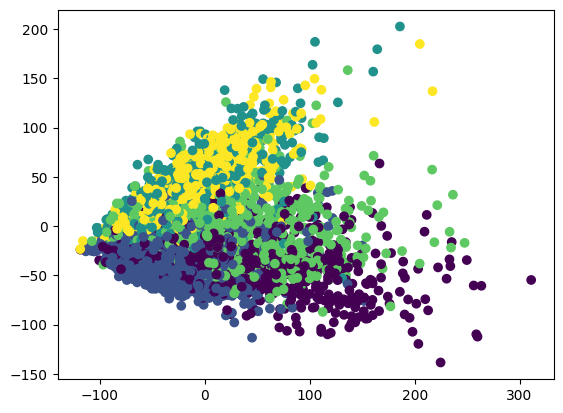

In [ ]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

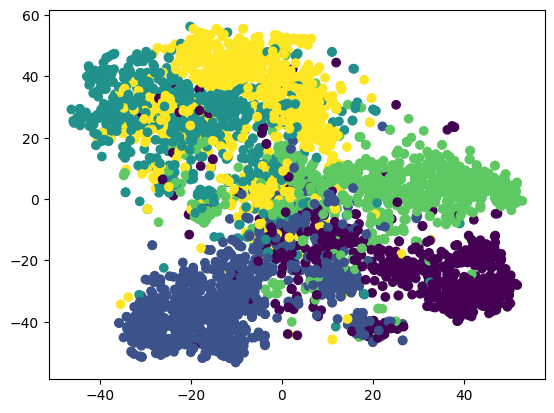

In [ ]:
from sklearn.manifold import TSNE

f_tsne = TSNE(n_components=2).fit_transform(f_all)
plt.scatter(*f_tsne.T, c=y_all)

Q23 text answer:

Some classes are more seprated than others, for instance, purple ones are mostly isolated from other clusters.But green clusters overlaps with red clusters and blue clusters. This suggested that VGG network can distinguish some type of data better than others.
Additionally, it can be noticed that some data points are outliers, and this means that they are awa from their own clusters because of some reaons, like noisy, blurry, or other issues with the photos.

More importantly, the second image shows a better clustering result than the first one, and this means that the second one have retained the information better.

Codes for q24:

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
100%|██████████| 58/58 [00:33<00:00,  1.74it/s]


(3670, 4096) (3670,)


100%|██████████| 100/100 [00:18<00:00,  5.28it/s]


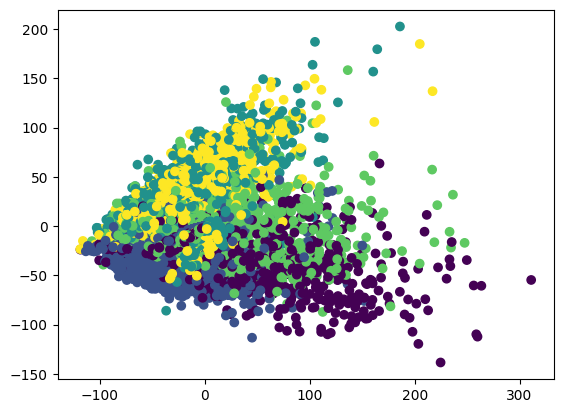

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import requests
import os
import tarfile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.cluster import AgglomerativeClustering
from hdbscan import HDBSCAN
import umap

filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            self.pooling = vgg.avgpool
            self.flatten = nn.Flatten()
            self.fc = vgg.classifier[0]

        def forward(self, x):
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out)
            return out

    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                                      std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

# MLP Classifier
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True),
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()


    def forward(self, X):
        return self.model(X)

    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()

        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                optimizer.zero_grad()
                outputs = self.model(X_)
                loss = criterion(outputs, y_)
                loss.backward()
                optimizer.step()
        return self

    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')

        self.model.eval()
        criterion = nn.NLLLoss()
        outputs = self.model(X_test)
        loss = criterion(outputs, y_test)
        return loss.item()

# Autoencoder
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None
        self.encoder = None
        self.decoder = None

    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))

    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                output = self(X_)
                loss = criterion(output, X_)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self

    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

X_em = Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)


In [ ]:
labels_none = np.zeros_like(y_all)

# Clustering: SVD
svd = PCA(n_components=50)
X_svd = svd.fit_transform(f_all)
kmeans_svd = KMeans(n_clusters=5)
labels_svd = kmeans_svd.fit_predict(X_svd)

# Clustering: UMAP
umap_reducer = umap.UMAP(n_components=50)
X_umap = umap_reducer.fit_transform(f_all)
kmeans_umap = KMeans(n_clusters=5)
labels_umap = kmeans_umap.fit_predict(X_umap)

# Clustering: Autoencoder
autoencoder = Autoencoder(n_components=50).fit(f_all)
X_autoencoder = autoencoder.transform(f_all)
kmeans_autoencoder = KMeans(n_clusters=5)
labels_autoencoder = kmeans_autoencoder.fit_predict(X_autoencoder)

# Clustering: K-Means
kmeans_kmeans = KMeans(n_clusters=5)
labels_kmeans = kmeans_kmeans.fit_predict(f_all)

# Clustering: Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
labels_agg = agg_clustering.fit_predict(f_all)

# Clustering: HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=5, min_samples=5)
labels_hdbscan = hdbscan.fit_predict(f_all)

# Compute Rand scores
rand_scores = [
    adjusted_rand_score(y_all, labels_none),
    adjusted_rand_score(y_all, labels_svd),
    adjusted_rand_score(y_all, labels_umap),
    adjusted_rand_score(y_all, labels_autoencoder),
    adjusted_rand_score(y_all, labels_kmeans),
    adjusted_rand_score(y_all, labels_agg),
    adjusted_rand_score(y_all, labels_hdbscan)
]

print("Rand scores:")
print("None:", rand_scores[0])
print("SVD:", rand_scores[1])
print("UMAP:", rand_scores[2])
print("Autoencoder:", rand_scores[3])
print("K-Means:", rand_scores[4])
print("Agglomerative Clustering:", rand_scores[5])
print("HDBSCAN:", rand_scores[6])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 100/100 [00:19<00:00,  5.20it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Rand scores:
None: 0.0
SVD: 0.19071616219335202
UMAP: 0.3975701600449636
Autoencoder: 0.2117826055669328
K-Means: 0.18919803381799868
Agglomerative Clustering: 0.2184499487113686
HDBSCAN: 0.006705947729476718


*q24 text answer*

Report the best result in terms of rand score within the table below:

None: 0.0

SVD: 0.19071616219335202

UMAP: 0.3975701600449636

Autoencoder: 0.2117826055669328

K-Means: 0.18919803381799868

Agglomerative Clustering: 0.2184499487113686

HDBSCAN: 0.006705947729476718






None: rand score is 0 , which means that no aggrement between the truth and the clustering label. This indicated that there is no clustering performed and all data point are single cluster.

SVD: the rand score indicates that some agreement between the truth and the clustering label. But it is not doing that well.
UMAP: the rand score is relatively high between the truth and the labeled clustering. Compare to SVD, there is a improvement.

Auto-encoder: the rand score is between SVD and UMAP and there are moderate agreement between the truth and the labeling.

Means: the score is similar to SVD, and this means there is no significant improvement when comparing the SVD.

Agglomerative clustering:Slightly improvement compare to SVD but less the UMAP

HDBscan: the score is very low comparing to others, and this means HDBSCAN performs poorly when comparing the labeling and the truth.

*Question 25*



In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True),
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()


    def forward(self, X):
        return self.model(X)

    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()

        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                X_, y_ = X_.cuda(), y_.cuda()

                optimizer.zero_grad()
                outputs = self(X_)
                loss = criterion(outputs, y_)
                loss.backward()
                optimizer.step()

        return self

    def eval(self, X_test, y_test):
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')

        self.model.eval()

        with torch.no_grad():
            outputs = self(X_test)
            _, predicted = torch.max(outputs, 1)
            accuracy = torch.sum(predicted == y_test).item() / len(y_test)

        return accuracy

In [ ]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None
        self.encoder = None
        self.decoder = None

    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))

    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                output = self(X_)
                loss = criterion(output, X_)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self

    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

In [ ]:
import os

filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            self.pooling = vgg.avgpool
            self.flatten = nn.Flatten()
            self.fc = vgg.classifier[0]

        def forward(self, x):
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out)
            return out

    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])




Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 127MB/s]
100%|██████████| 58/58 [00:33<00:00,  1.71it/s]


100%|██████████| 100/100 [00:20<00:00,  4.81it/s]


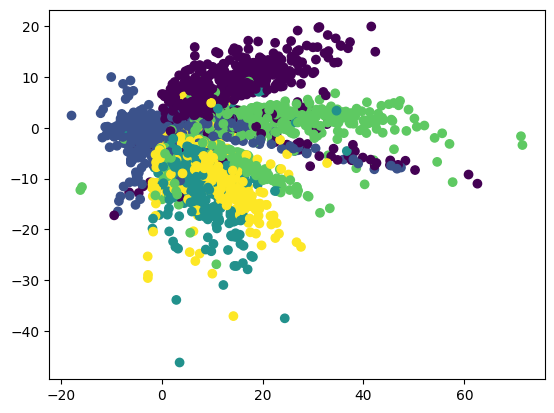

In [ ]:
    X_em =Autoencoder(2).fit_transform(f_all)
    plt.scatter(*X_em.T, c=y_all)

*Question 25 text part*:

The points in the graph are not seprate, and clusters are close together and cannot easily seprated. This means information is lost during the reduction process, so it suffers from dimentional reduction, and it is significant because that I see they got mixed together. This makes sense because clustering result in question 24 is not very good, and the reduced dimension feature fails to represent underlaying structure of the data, so it is expected that performance of MLP classifier suffer from reduced dimension feature.

# Question 26-28

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: images/Abomasnow/0.jpg  
  inflating: images/Abomasnow/1.jpg  
  inflating: images/Abomasnow/2.jpg  
  inflating: images/Abomasnow/3.jpg  
  inflating: images/Abra/0.jpg       
  inflating: images/Abra/1.jpg       
  inflating: images/Abra/2.jpg       
  inflating: images/Abra/3.jpg       
  inflating: images/Absol/0.jpg      
  inflating: images/Absol/1.jpg      
  inflating: images/Absol/2.jpg      
  inflating: images/Absol/3.jpg      
  inflating: images/Accelgor/0.jpg   
  inflating: images/Accelgor/1.jpg   
  inflating: images/Aegislash/0.jpg  
  inflating: images/Aegislash/1.jpg  
  inflating: images/Aegislash/2.jpg  
  inflating: images/Aegislash/3.jpg  
  inflating: images/Aerodactyl/0.jpg  
  inflating: images/Aerodactyl/1.jpg  
  inflating: images/Aerodactyl/2.jpg  
  inflating: images/Aerodactyl/3.jpg  
  inflating: images/Aerodactyl/4.jpg  
  inflating: images/Aerodactyl/5.jpg  
  inflating: images/Aggron/0.jpg     
  inflating: images/Ag

In [ ]:
!pip install datasets transformers numpy pandas Pillow matplotlib
!pip install torch tqdm scipy
!pip install git+https://github.com/openai/CLIP.git
!pip install plotly umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-2n_tjhqc
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-2n_tjhqc
  Resolved https://github.com/openai/CLIP.git 

In [ ]:
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import clip
import torch
from tqdm import tqdm
from scipy.special import softmax
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE

In [ ]:
# load csv file and image paths to construct pokedex, use type_to_load=None to load all types, else use a list of types 1 to load
def construct_pokedex(csv_path='Pokemon.csv', image_dir='./images/', type_to_load=None):
    pokedex = pd.read_csv(csv_path)
    image_paths = []

    for pokemon_name in pokedex["Name"]:
        imgs = glob(f"{image_dir}/{pokemon_name}/0.jpg")
        if len(imgs) > 0:
            image_paths.append(imgs[0])
        else:
            image_paths.append(None)

    pokedex["image_path"] = image_paths
    pokedex = pokedex[pokedex["image_path"].notna()].reset_index(drop=True)

    # only keep pokemon with distinct id
    ids, id_counts = np.unique(pokedex["ID"], return_counts=True)
    ids, id_counts = np.array(ids), np.array(id_counts)
    keep_ids = ids[id_counts == 1]

    pokedex = pokedex[pokedex["ID"].isin(keep_ids)].reset_index(drop=True)
    pokedex["Type2"] = pokedex["Type2"].str.strip()
    if type_to_load is not None:
        pokedex = pokedex[pokedex["Type1"].isin(type_to_load)].reset_index(drop=True)
    return pokedex

# load clip model
def load_clip_model():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-L/14", device=device)
    return model, preprocess, device

# inference clip model on a list of image path
def clip_inference_image(model, preprocess, image_paths, device):
    image_embeddings = []
    with torch.no_grad():
        for img_path in tqdm(image_paths):
            img = Image.open(img_path)
            img_preprocessed = preprocess(img).unsqueeze(0).to(device)
            image_embedding = model.encode_image(img_preprocessed).detach().cpu().numpy()
            image_embeddings += [image_embedding]

    image_embeddings = np.concatenate(image_embeddings, axis=0)
    image_embeddings /= np.linalg.norm(image_embeddings, axis=-1, keepdims=True)
    return image_embeddings

# inference clip model on a list of texts
def clip_inference_text(model, preprocess, texts, device):
    with torch.no_grad():
        text_embeddings = model.encode_text(clip.tokenize(texts).to(device)).detach().cpu().numpy()
    text_embeddings /= np.linalg.norm(text_embeddings, axis=-1, keepdims=True)
    return text_embeddings

# compute similarity of texts to each image
def compute_similarity_text_to_image(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=-1)
    return similarity

# compute similarity of iamges to each text
def compute_similarity_image_to_text(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=0)
    return similarity

# Use TSNE to project CLIP embeddings to 2D space
def umap_projection(image_embeddings, n_neighbors=15, min_dist=0.1, metric='cosine'):
    distance_matrix = np.zeros((image_embeddings.shape[0], image_embeddings.shape[0]))
    for i in range(image_embeddings.shape[0]):
        for j in range(image_embeddings.shape[0]):
            if i == j:
                distance_matrix[i, j] = 1
            else:
                distance_matrix[i, j] = np.dot(image_embeddings[i], image_embeddings[j])
    distance_matrix = 1 - distance_matrix
    reducer = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
    visualization_data = reducer.fit_transform(distance_matrix)
    return visualization_data

In [ ]:
pokedex = construct_pokedex()
model, preprocess, device = load_clip_model()
image_embeddings = clip_inference_image(model, preprocess, pokedex["image_path"], device)

100%|███████████████████████████████████████| 890M/890M [00:11<00:00, 82.1MiB/s]
100%|██████████| 753/753 [45:45<00:00,  3.65s/it]


## Question 26

In this part, we created three types of text queries:

* "type: type_name" OR "type: type_name1 and type_name2"
* "type_name type Pokemon" OR "type_name1 and type_name2 type Pokemon"
* "Pokemon with type_name" OR "Pokemon with type_name1 and type_name2"

In [ ]:
# "type: type_name"
# "type: type_name1 and type_name2"
def construct_query_typeA(texts1, texts2):
    query = []
    if texts2 == None:
        for i in range(len(texts1)):
            query.append("type: " + texts1[i])
    else:
        for i in range(len(texts1)):
            if texts2[i] == '':
                query.append("type: " + texts1[i])
            else:
                query.append("type: " + texts1[i] + " and " + texts2[i])
    query = pd.Series(query)
    return query

# "type_name type Pokemon"
# "type_name1 and type_name2 type Pokemon"
def construct_query_typeB(texts1, texts2):
    query = []
    if texts2 == None:
        for i in range(len(texts1)):
            query.append(texts1[i] + " type Pokemon")
    else:
        for i in range(len(texts1)):
            if texts2[i] == '':
                query.append(texts1[i] + " type Pokemon")
            else:
                query.append(texts1[i] + " and " + texts2[i] + " type Pokemon")
    query = pd.Series(query)
    return query

# "Pokemon with type_name"
# "Pokemon with type_name1 and type_name2"
def construct_query_typeC(texts1, texts2):
    query = []
    if texts2 == None:
        for i in range(len(texts1)):
            query.append("Pokemon with " + texts1[i])
    else:
        for i in range(len(texts1)):
            if texts2[i] == '':
                query.append("Pokemon with " + texts1[i])
            else:
                query.append("Pokemon with " + texts1[i] + " and " + texts2[i])
    query = pd.Series(query)
    return query

def avg_similarity(image_embeddings, text_embeddings):
    s1 = compute_similarity_image_to_text(image_embeddings, text_embeddings)
    s2 = compute_similarity_text_to_image(image_embeddings, text_embeddings)
    return (np.trace(s1)/s1.shape[0] + np.trace(s2)/s2.shape[0])/2

In [ ]:
query_typeA = construct_query_typeA(pokedex["Type1"], pokedex["Type2"])
query_typeB = construct_query_typeB(pokedex["Type1"], pokedex["Type2"])
query_typeC = construct_query_typeC(pokedex["Type1"], pokedex["Type2"])
text_embeddings_A = clip_inference_text(model, preprocess, query_typeA, device)
text_embeddings_B = clip_inference_text(model, preprocess, query_typeB, device)
text_embeddings_C = clip_inference_text(model, preprocess, query_typeC, device)

In [ ]:
print(avg_similarity(image_embeddings, text_embeddings_A))
print(avg_similarity(image_embeddings, text_embeddings_B))
print(avg_similarity(image_embeddings, text_embeddings_C))

0.011364577775932402
0.011921476716222675
0.010087977050943362


* The results above show that the second type ("type_name type Pokemon" OR "type_name1 and type_name2 type Pokemon") is the most suitable template for queries.

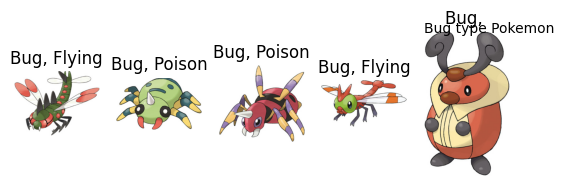

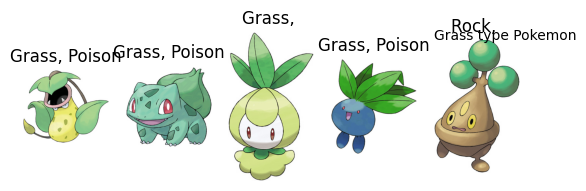

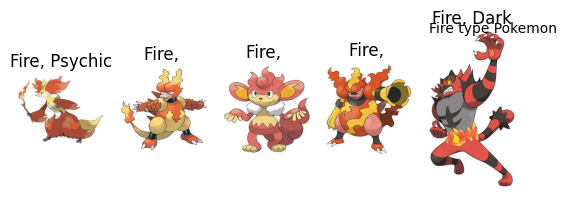

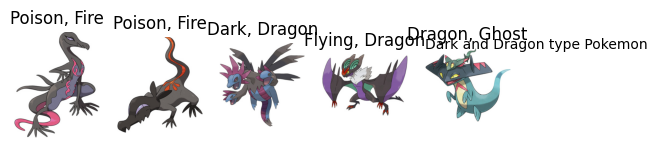

In [ ]:
import matplotlib.image as mpimg


def plot_images(type_name1, type_name2=None):
    query = construct_query_typeB(type_name1, type_name2)
    text_embeddings = clip_inference_text(model, preprocess, query, device)
    similarities = (text_embeddings @ image_embeddings.T)[0]
    index = np.argsort(similarities)[-5:][::-1].tolist()
    paths = pokedex["image_path"][index].tolist()
    images = [mpimg.imread(path) for path in paths]
    for i in range(len(images)):
        ax = plt.subplot(1, 5, i+1)
        plt.imshow(images[i])
        plt.axis('off')
        ax.set_title(pokedex["Type1"][index[i]] + ", " + pokedex["Type2"][index[i]])
    ax.text(0, 0, query[0])
    plt.show()


plot_images(["Bug"])
plot_images(["Grass"])
plot_images(["Fire"])
plot_images(["Dark"], ["Dragon"])

* The top five most relevant Pokemon for type "Bug", "Fire", "Grass" and "Dark and Dragon" are shown above.
* We found that the accuracies for "Bug", "Fire", "Grass" are much better than "Dark and Dragon", which is because there are some samples hard to classify because they look like dark dragon. While samples of "Bug", "Fire", "Grass" are more distinctive.

## Question 27

In [ ]:
import random


random.seed(42)
samples_index = random.sample(range(0, len(pokedex["image_path"])), 10)
samples_image_embeddings = clip_inference_image(model, preprocess, pokedex["image_path"][samples_index], device)

100%|██████████| 10/10 [00:37<00:00,  3.71s/it]


In [ ]:
similarities = (text_embeddings_B @ samples_image_embeddings.T).T


In [ ]:
similarities.shape

(10, 753)

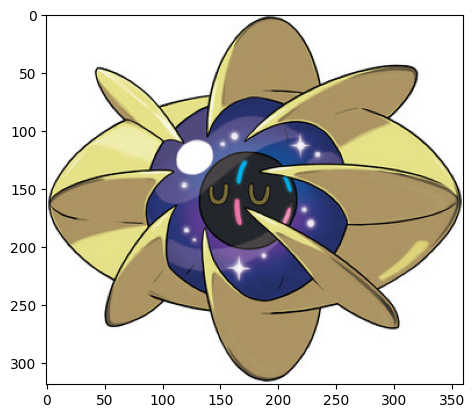

Name:  Inkay
Type:  Dark   Psychic
Top five predicted types: 
Dark
Dark
Dark
Dark
Dark



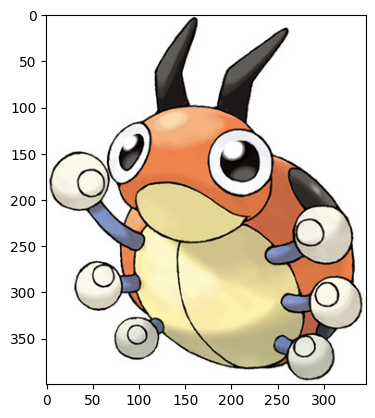

Name:  Shuckle
Type:  Bug   Rock
Top five predicted types: 
Bug
Bug
Bug
Bug
Bug



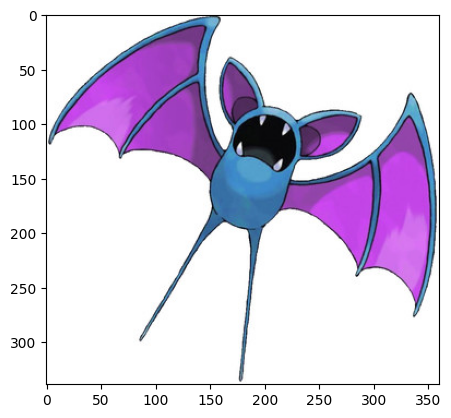

Name:  Murkrow
Type:  Dark   Flying
Top five predicted types: 
Dark
Dark
Dark
Dark
Dark



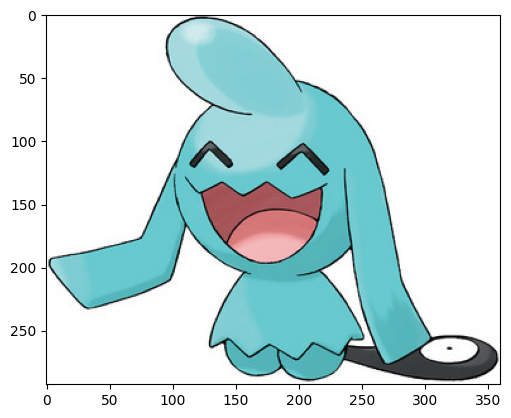

Name:  Snorunt
Type:  Ice   
Top five predicted types: 
Ice
Ice
Ice
Ice
Ice



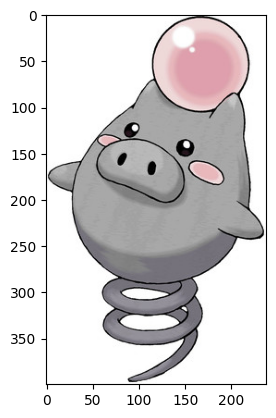

Name:  Cubone
Type:  Ground   
Top five predicted types: 
Ground
Ground
Ground
Ground
Ground



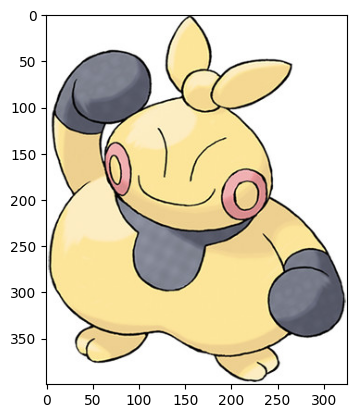

Name:  Electabuzz
Type:  Electric   
Top five predicted types: 
Electric
Electric
Electric
Electric
Electric



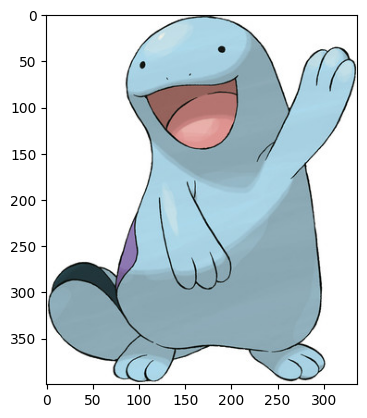

Name:  Snorunt
Type:  Ice   
Top five predicted types: 
Ice
Ice
Ice
Ice
Ice



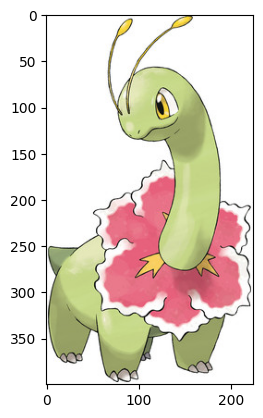

Name:  Ekans
Type:  Poison   
Top five predicted types: 
Poison
Poison
Poison
Poison
Poison



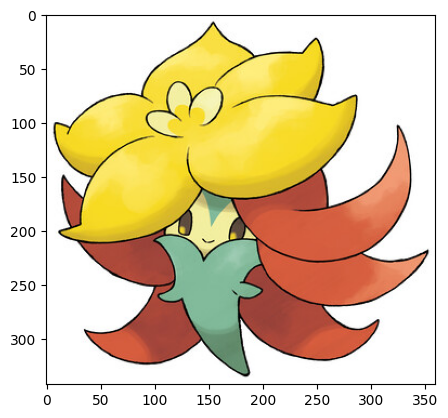

Name:  Celebi
Type:  Psychic   Grass
Top five predicted types: 
Psychic
Grass
Grass
Grass
Grass



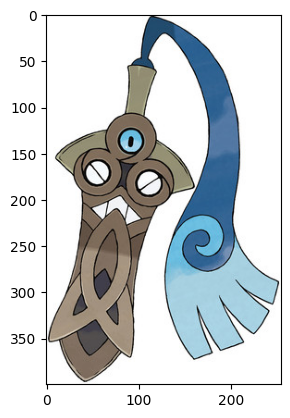

Name:  Carvanha
Type:  Water   Dark
Top five predicted types: 
Water
Water
Psychic
Water
Dark



In [ ]:
for i in range(similarities.shape[0]):
    index = np.argmax(similarities[i])
    path = pokedex["image_path"][samples_index[i]]
    plt.imshow(mpimg.imread(path))
    plt.show()
    print("Name: ", pokedex["Name"].tolist()[index])
    print("Type: ", pokedex["Type1"].tolist()[index], " ", pokedex["Type2"].tolist()[index])
    five_index = np.argsort(similarities)[i][-5:][::-1].tolist()
    print("Top five predicted types: ")
    for i in range(5):
        print(pokedex["Type1"][five_index[i]], )
    print()


* 10 samples of Pokemon images, name, type and predicted types are shown above.

## Question 28

In [ ]:
import plotly.express as px


umap_data = umap_projection(image_embeddings)

In [ ]:
pokedex["x"] = umap_data[:,0]
pokedex["y"] = umap_data[:,1]


lst_color = []
for i in range(len(pokedex)):
    if pokedex["Type1"][i] == "Bug" or pokedex["Type1"][i] == "Fire" or pokedex["Type1"][i] == "Grass":
        lst_color.append(pokedex["Type1"].iloc[i])
    else:
        lst_color.append(None)
pokedex["color"] = pd.Series(lst_color)

fig = px.scatter(pokedex, x="x", y="y", color="color", hover_data=["Name", "Type1", "Type2"])
fig.show()

* The clusters for Bug, Fire, and Grass are shown above, where the x and y coordinates represent the vectors of the projected data.
* We can see that some clusters are formed for Bug (purple) and Grass (Blue), but there are many data points that are not clustered evidently.